# <center><B> New York Airbnb House Price Prediction

<div style="text-align: right;"><B> Group 19</div> 
<div style="text-align: right;"><B>Preshanth Adhini Ramesh</div> 
<div style="text-align: right;"><B> Nethra Narayanan</div> 

#### <B> Table of contents 

1. Importing Necessary libraries
2. Importing Dataset
3. Data Preprocessing 
4. Preparing Data for Exploratory Data Analysis (EDA)
5. Visualization
6. Exploratory data analysis
7. Feature Selection
8. Data Modelling  


<div style="display: flex; justify-content: center;">
    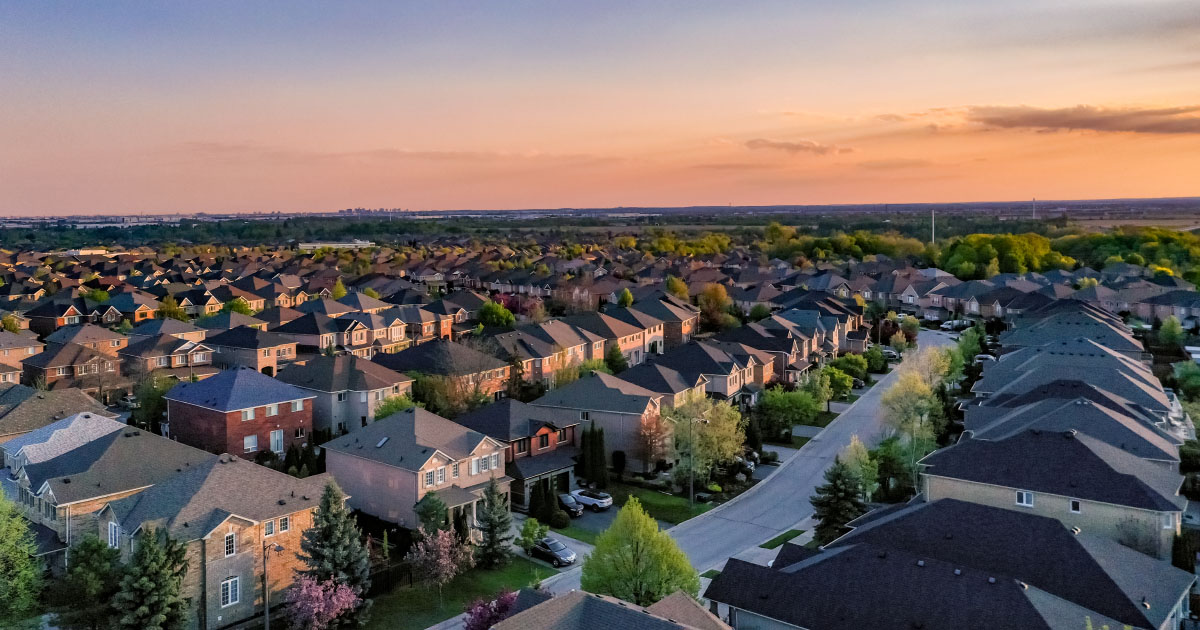
</div>

# 1. Importing Necessary libraries

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
#from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import r2_score,make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics

# 2. Importing Dataset

In [46]:
df = pd.read_excel("NYC.xlsx")

In [47]:
df.head(5)

id                        listing_url     scrape_id last_scraped  \
0  2595.0  https://www.airbnb.com/rooms/2595  2.022120e+13   2022-12-05   
1  5203.0  https://www.airbnb.com/rooms/5203  2.022120e+13   2022-12-05   
2  5136.0  https://www.airbnb.com/rooms/5136  2.022120e+13   2022-12-04   
3  5121.0  https://www.airbnb.com/rooms/5121  2.022120e+13   2022-12-05   
4  6848.0  https://www.airbnb.com/rooms/6848  2.022120e+13   2022-12-05   

            source                                      name  \
0      city scrape                     Skylit Midtown Castle   
1  previous scrape        Cozy Clean Guest Room - Family Apt   
2      city scrape  Spacious Brooklyn Duplex, Patio + Garden   
3      city scrape                           BlissArtsSpace!   
4      city scrape          Only 2 stops to Manhattan studio   

                                         description  \
0  Beautiful, spacious skylit studio in the heart...   
1  Our best guests are seeking a safe, clean, spa...   
2  We welcome you to stay in our lovely 2 br dupl...   
3  One room available for rent in a 2 bedroom apt...   
4  Comfortable studio apartment with super comfor...   

                               neighborhood_overview  \
0  Centrally located in the heart of Manhattan ju...   
1  Our neighborhood is full of restaurants and ca...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/f0813a11-40b2...   2845.0  ...   
1  https://a0.muscache.com/pictures/103776/b37157...   7490.0  ...   
2  https://a0.muscache.com/pictures/miso/Hosting-...   7378.0  ...   
3  https://a0.muscache.com/pictures/2090980c-b68e...   7356.0  ...   
4  https://a0.muscache.com/pictures/e4f031a7-f146...  15991.0  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.80                   4.81                4.40   
1                        4.95                   4.94                4.92   
2                        5.00                   4.67                5.00   
3                        4.91                   4.47                4.52   
4                        4.80                   4.67                4.56   

  license instant_bookable calculated_host_listings_count  \
0     NaN                f                            3.0   
1     NaN                f                            1.0   
2     NaN                f                            1.0   
3     NaN                f                            2.0   
4     NaN                f                            1.0   

   calculated_host_listings_count_entire_homes  \
0                                          3.0   
1                                          0.0   
2                                          1.0   
3                                          0.0   
4                                          1.0   

   calculated_host_listings_count_private_rooms  \
0                                           0.0   
1                                           1.0   
2                                           0.0   
3                                           2.0   
4                                           0.0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                         0.0              0.31  
1                                         0.0              0.73  
2                                         0.0              0.03  
3                                         0.0              0.30  
4                                         0.0              1.13  

[5 rows x 75 columns]

# 3. Data Preprocessing 

In [48]:
#to know data dimensions
df.shape

(25740, 75)

In [49]:
# Count the number of columns with each data type
dtype_counts = df.dtypes.value_counts()
print(dtype_counts)

float64           42
object            28
datetime64[ns]     5
dtype: int64


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25740 entries, 0 to 25739
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            25697 non-null  float64       
 1   listing_url                                   25697 non-null  object        
 2   scrape_id                                     25697 non-null  float64       
 3   last_scraped                                  25697 non-null  datetime64[ns]
 4   source                                        25697 non-null  object        
 5   name                                          25687 non-null  object        
 6   description                                   25315 non-null  object        
 7   neighborhood_overview                         15608 non-null  object        
 8   picture_url                                   25697 non-null  obje

We can see that we have both numerical and categorical values here and our target value is numerical. 

In [51]:
#to visualize summary statistics of a DataFrame
print(df.describe())

                 id     scrape_id       host_id  host_response_rate  \
count  2.569700e+04  2.569700e+04  2.569700e+04        16855.000000   
mean   1.379451e+17  2.022120e+13  9.351456e+07            0.940824   
std    2.733534e+17  1.929725e+00  1.220735e+08            0.156444   
min    2.595000e+03  2.022120e+13  2.438000e+03            0.000000   
25%    1.308131e+07  2.022120e+13  8.518665e+06            0.970000   
50%    3.526908e+07  2.022120e+13  3.642389e+07            1.000000   
75%    5.296408e+07  2.022120e+13  1.290475e+08            1.000000   
max    7.737754e+17  2.022120e+13  4.897353e+08            1.000000   

       host_acceptance_rate  host_listings_count  host_total_listings_count  \
count          17809.000000         25697.000000               25697.000000   
mean               0.805073           105.584699                 135.814414   
std                0.280709           621.893938                 693.070398   
min                0.000000             1.00

In [52]:
# To find missing values for each feature
missing_values=df.isnull().sum()
pd.options.display.max_rows=100
print(missing_values)

id                                                 43
listing_url                                        43
scrape_id                                          43
last_scraped                                       43
source                                             43
name                                               53
description                                       425
neighborhood_overview                           10132
picture_url                                        43
host_id                                            43
host_url                                           43
host_name                                          43
host_since                                         43
host_location                                      43
host_about                                       7902
host_response_time                               8885
host_response_rate                               8885
host_acceptance_rate                             7931
host_is_superhost           

# 4. Preparing Data for Exploratory Data Analysis (EDA)

### Dropping columns with missing values grater than 30%

In [53]:
def MV_drop(df):
    # Drop columns that are not useful for analysis based on manual inspection
    columns_to_drop = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'picture_url', 
                       'host_url', 'host_thumbnail_url', 'host_picture_url', 'host_about','first_review','last_review', 'name', 'description']
    df = df.drop(columns=columns_to_drop, axis=1)
    # Droping columns that with high percentage of missing values
    df_drop = pd.DataFrame(df.isnull().sum())
    df_drop.columns = ['Total']
    df = df[list(df_drop[df_drop['Total'] / 25308 * 100 < 30].index)]
    return df
    

In [54]:
df = MV_drop(df)

### Imputing missing values

In [55]:
def replace_values(df):
    # Drop rows with missing values in 'host_is_superhost' column
    df.dropna(subset=['host_is_superhost'], inplace=True)
    
    # Fill missing values in 'host_neighbourhood' column with 'Unknown'
    df['host_neighbourhood'].fillna('Unknown', inplace=True)
    
    # calculate and impute the mode for 'bedrooms' and 'beds' columns
    bedrooms_mode = df['bedrooms'].mode()[0]
    df['bedrooms'].fillna(bedrooms_mode, inplace=True)
    df['bedrooms'] = df['bedrooms'].round().astype(int)

    beds_mode = df['beds'].mode()[0]
    df['beds'].fillna(beds_mode, inplace=True)
    
    #Review Ratings filling missing values
    df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].median())
    df['review_scores_accuracy'] = df['review_scores_accuracy'].fillna(df['review_scores_accuracy'].median())
    df['review_scores_cleanliness'] = df['review_scores_cleanliness'].fillna(df['review_scores_cleanliness'].median())
    df['review_scores_communication'] = df['review_scores_communication'].fillna(df['review_scores_communication'].median())
    df['review_scores_checkin'] = df['review_scores_checkin'].fillna(df['review_scores_checkin'].median())
    df['review_scores_location'] = df['review_scores_location'].fillna(df['review_scores_location'].median())
    return df


In [56]:
df= replace_values(df)

In [57]:
def BE_fill(df):  
    # Map values in 'bathrooms_text' column to values
    bathroom_mapping = {
        '0 baths': 0.0,
        '0 shared baths': 0.0,
        '1 bath': 1.0,
        '1 shared bath': 1.0,
        '1 private bath': 1.0,
        '1.5 baths': 1.5,
        '1.5 shared baths': 1.5,
        '2 baths': 2.0,
        '2 shared baths': 2.0,
        '2.5 baths': 2.5,
        '2.5 shared baths': 2.5,
        '3 baths': 3.0,
        '3 shared baths': 3.0,
        '3.5 baths': 3.5,
        '4 baths': 4.0,
        '4.5 baths': 4.5,
        '4 shared baths': 4.0,
        '4.5 shared baths': 4.5,
        '5 baths': 5.0,
        '5.5 baths': 5.5,
        '6 baths': 6.0,
        '6 shared baths': 6.0,
        '7 baths': 7.0,
        'Half-bath': 0.5,
        'Shared half-bath': 0.5,
        'Private half-bath': 0.5
        }

    df["bathrooms_text"] = df["bathrooms_text"].map(bathroom_mapping)
    df['review_scores_value'] = df['review_scores_value'].fillna(df['review_scores_value'].median())
    df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].median())
    # convert the host_since column to datetime format
    df['host_since'] = pd.to_datetime(df['host_since'])
    # extract the year from the host_since column and store it in the same column
    df['host_since'] = df['host_since'].dt.year
    df.dropna(subset=['bathrooms_text'], inplace=True)
    return df




In [58]:
df=BE_fill(df)

In [59]:
# Convert price column to string type
df['price'] = df['price'].astype(str)

# Remove any non-numeric characters from price column
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.replace('$', '',regex=False)

# Convert price column to float type
df['price'] = df['price'].astype(float)

df = df[(df['price'] >100) & (df['price'] < 600)].copy()

# 5. Visualization

<B> Visualizing Key Insights from the Dataset

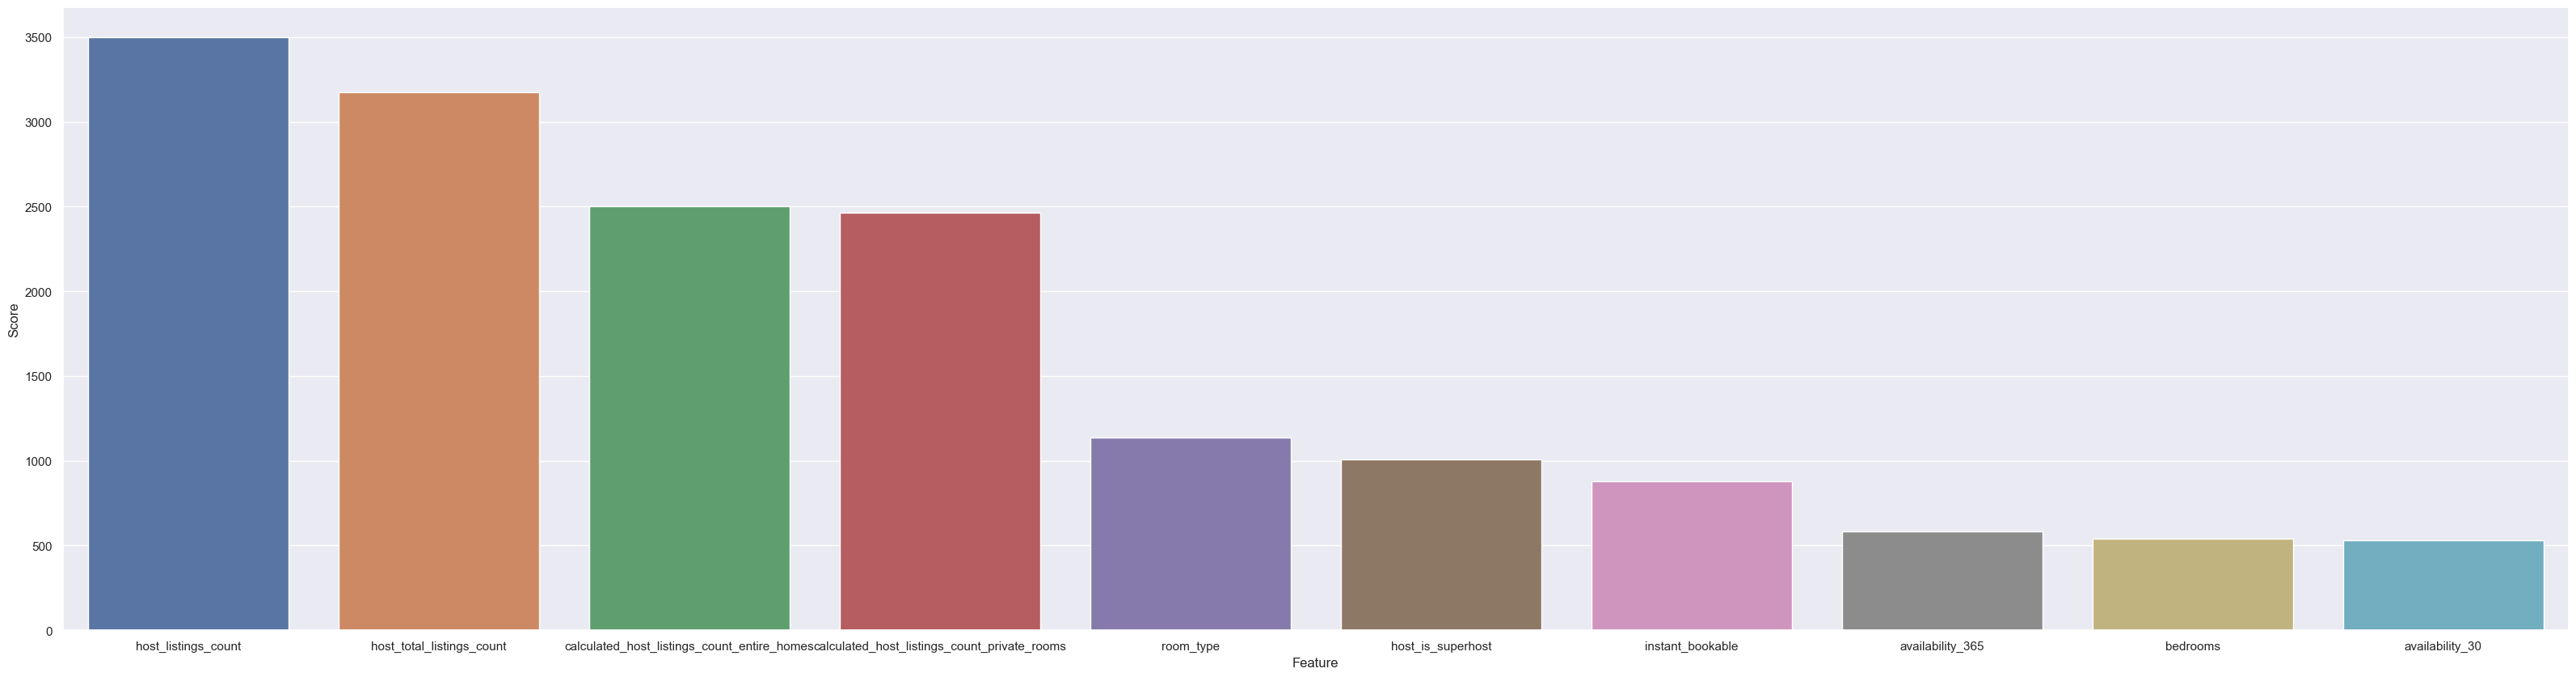

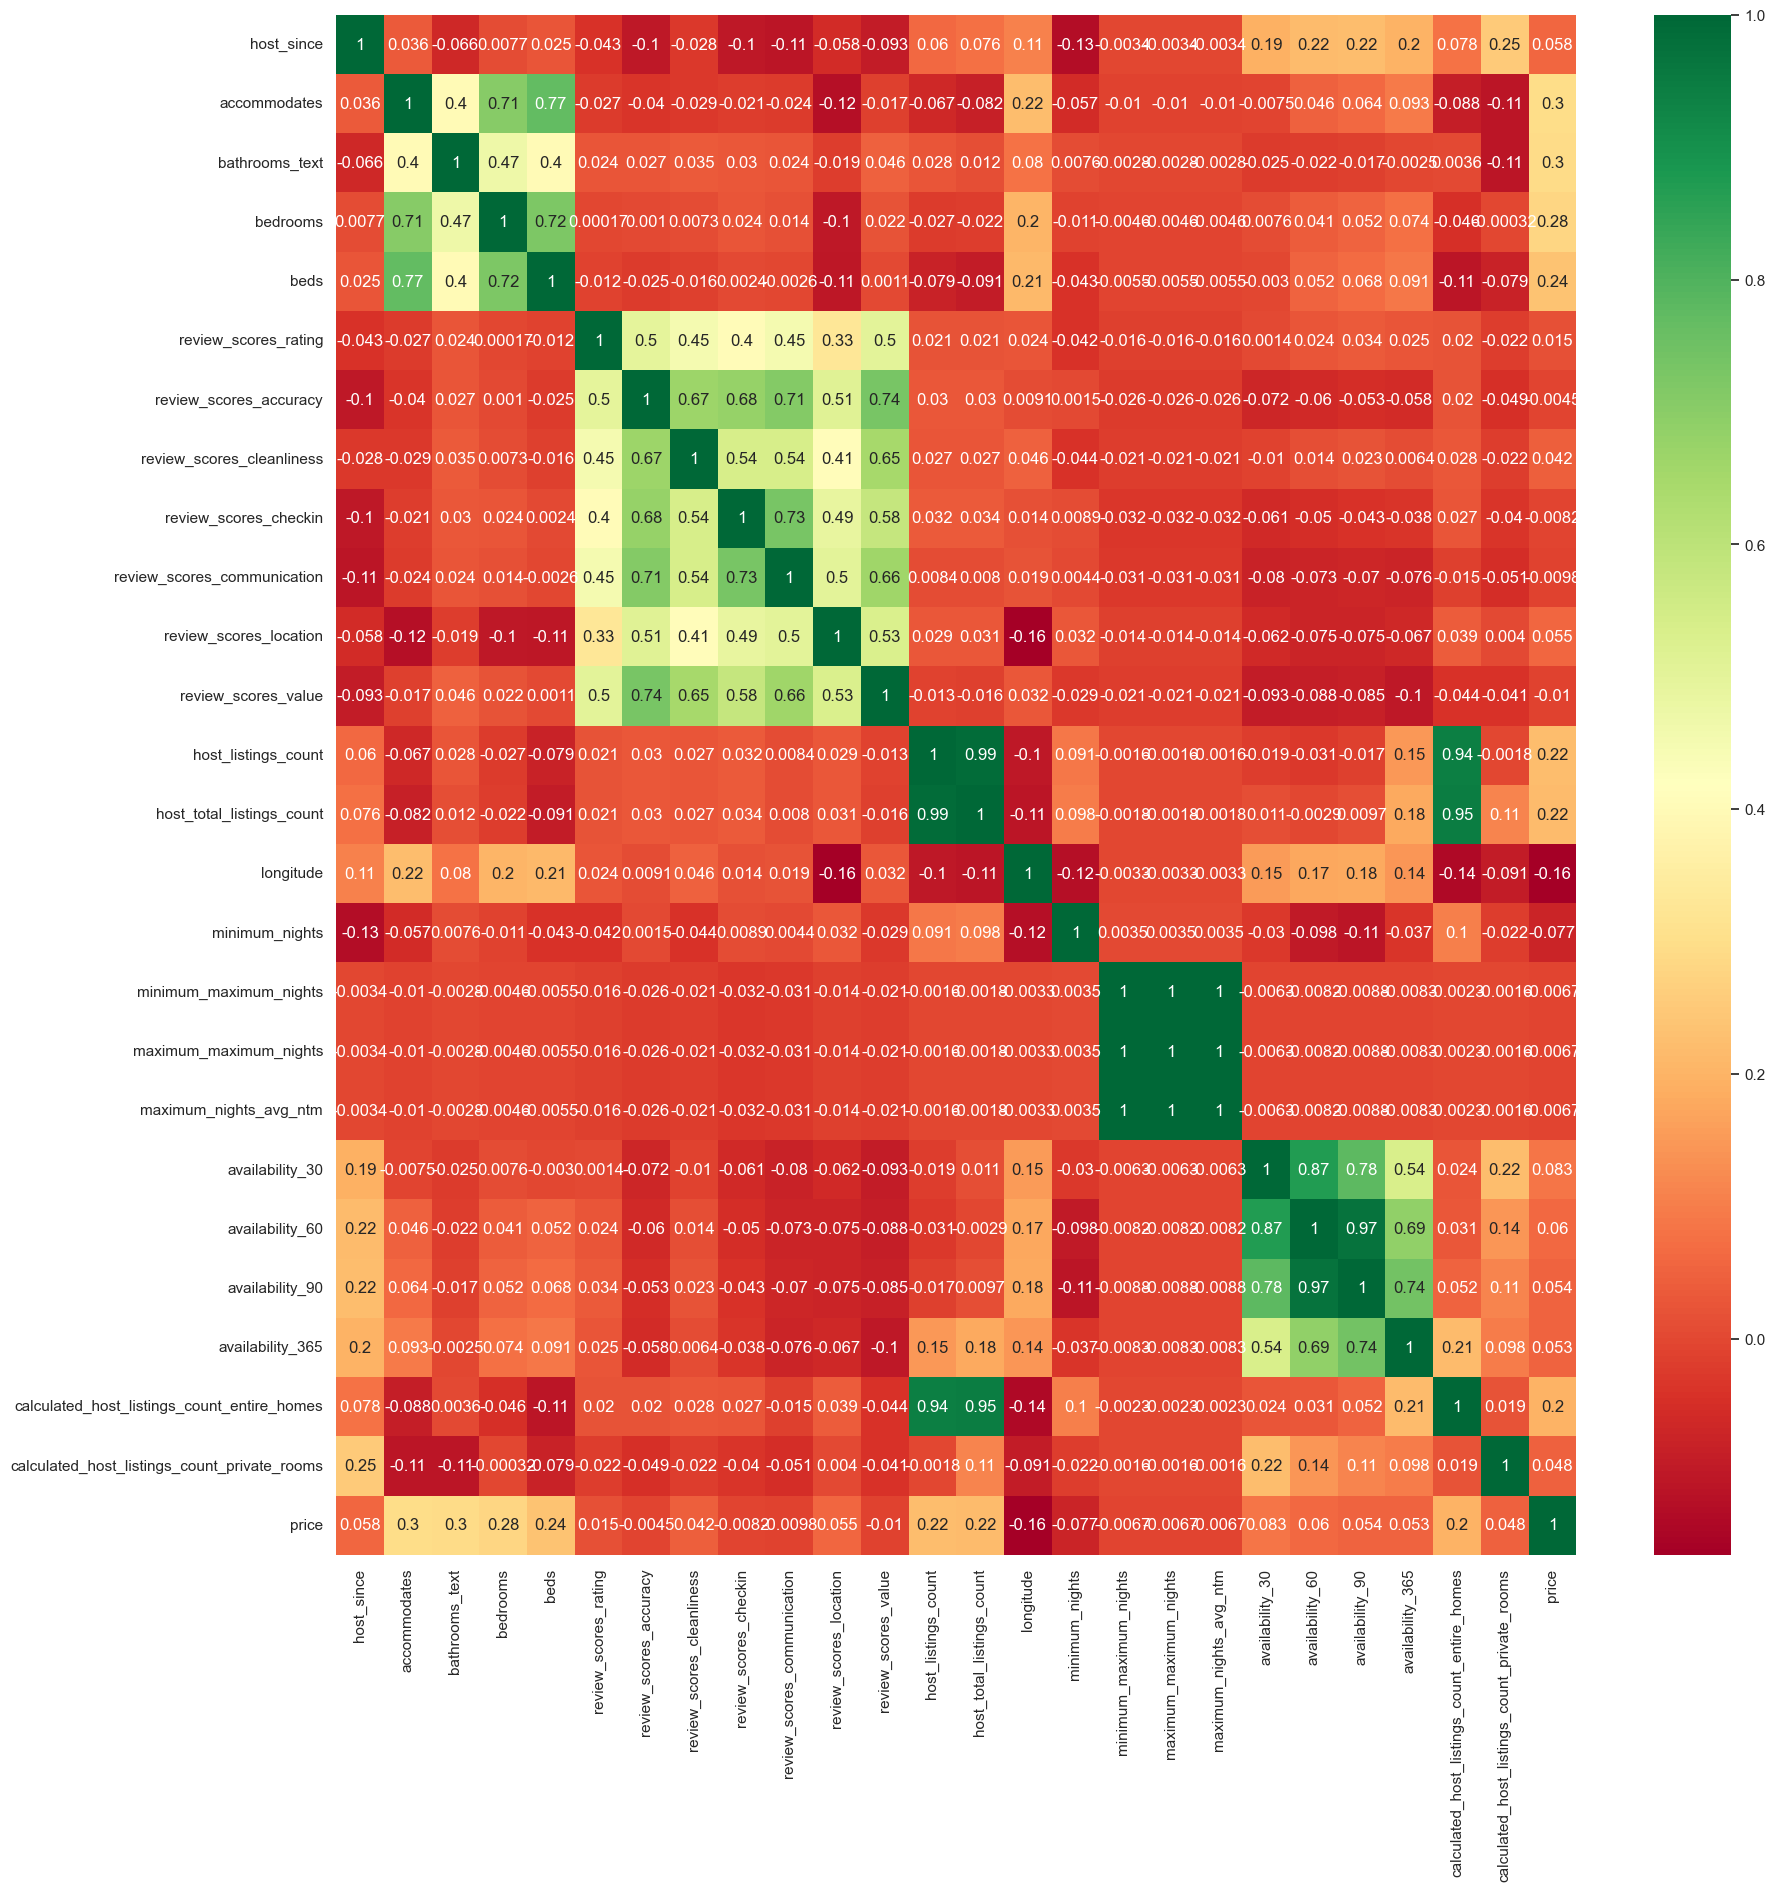

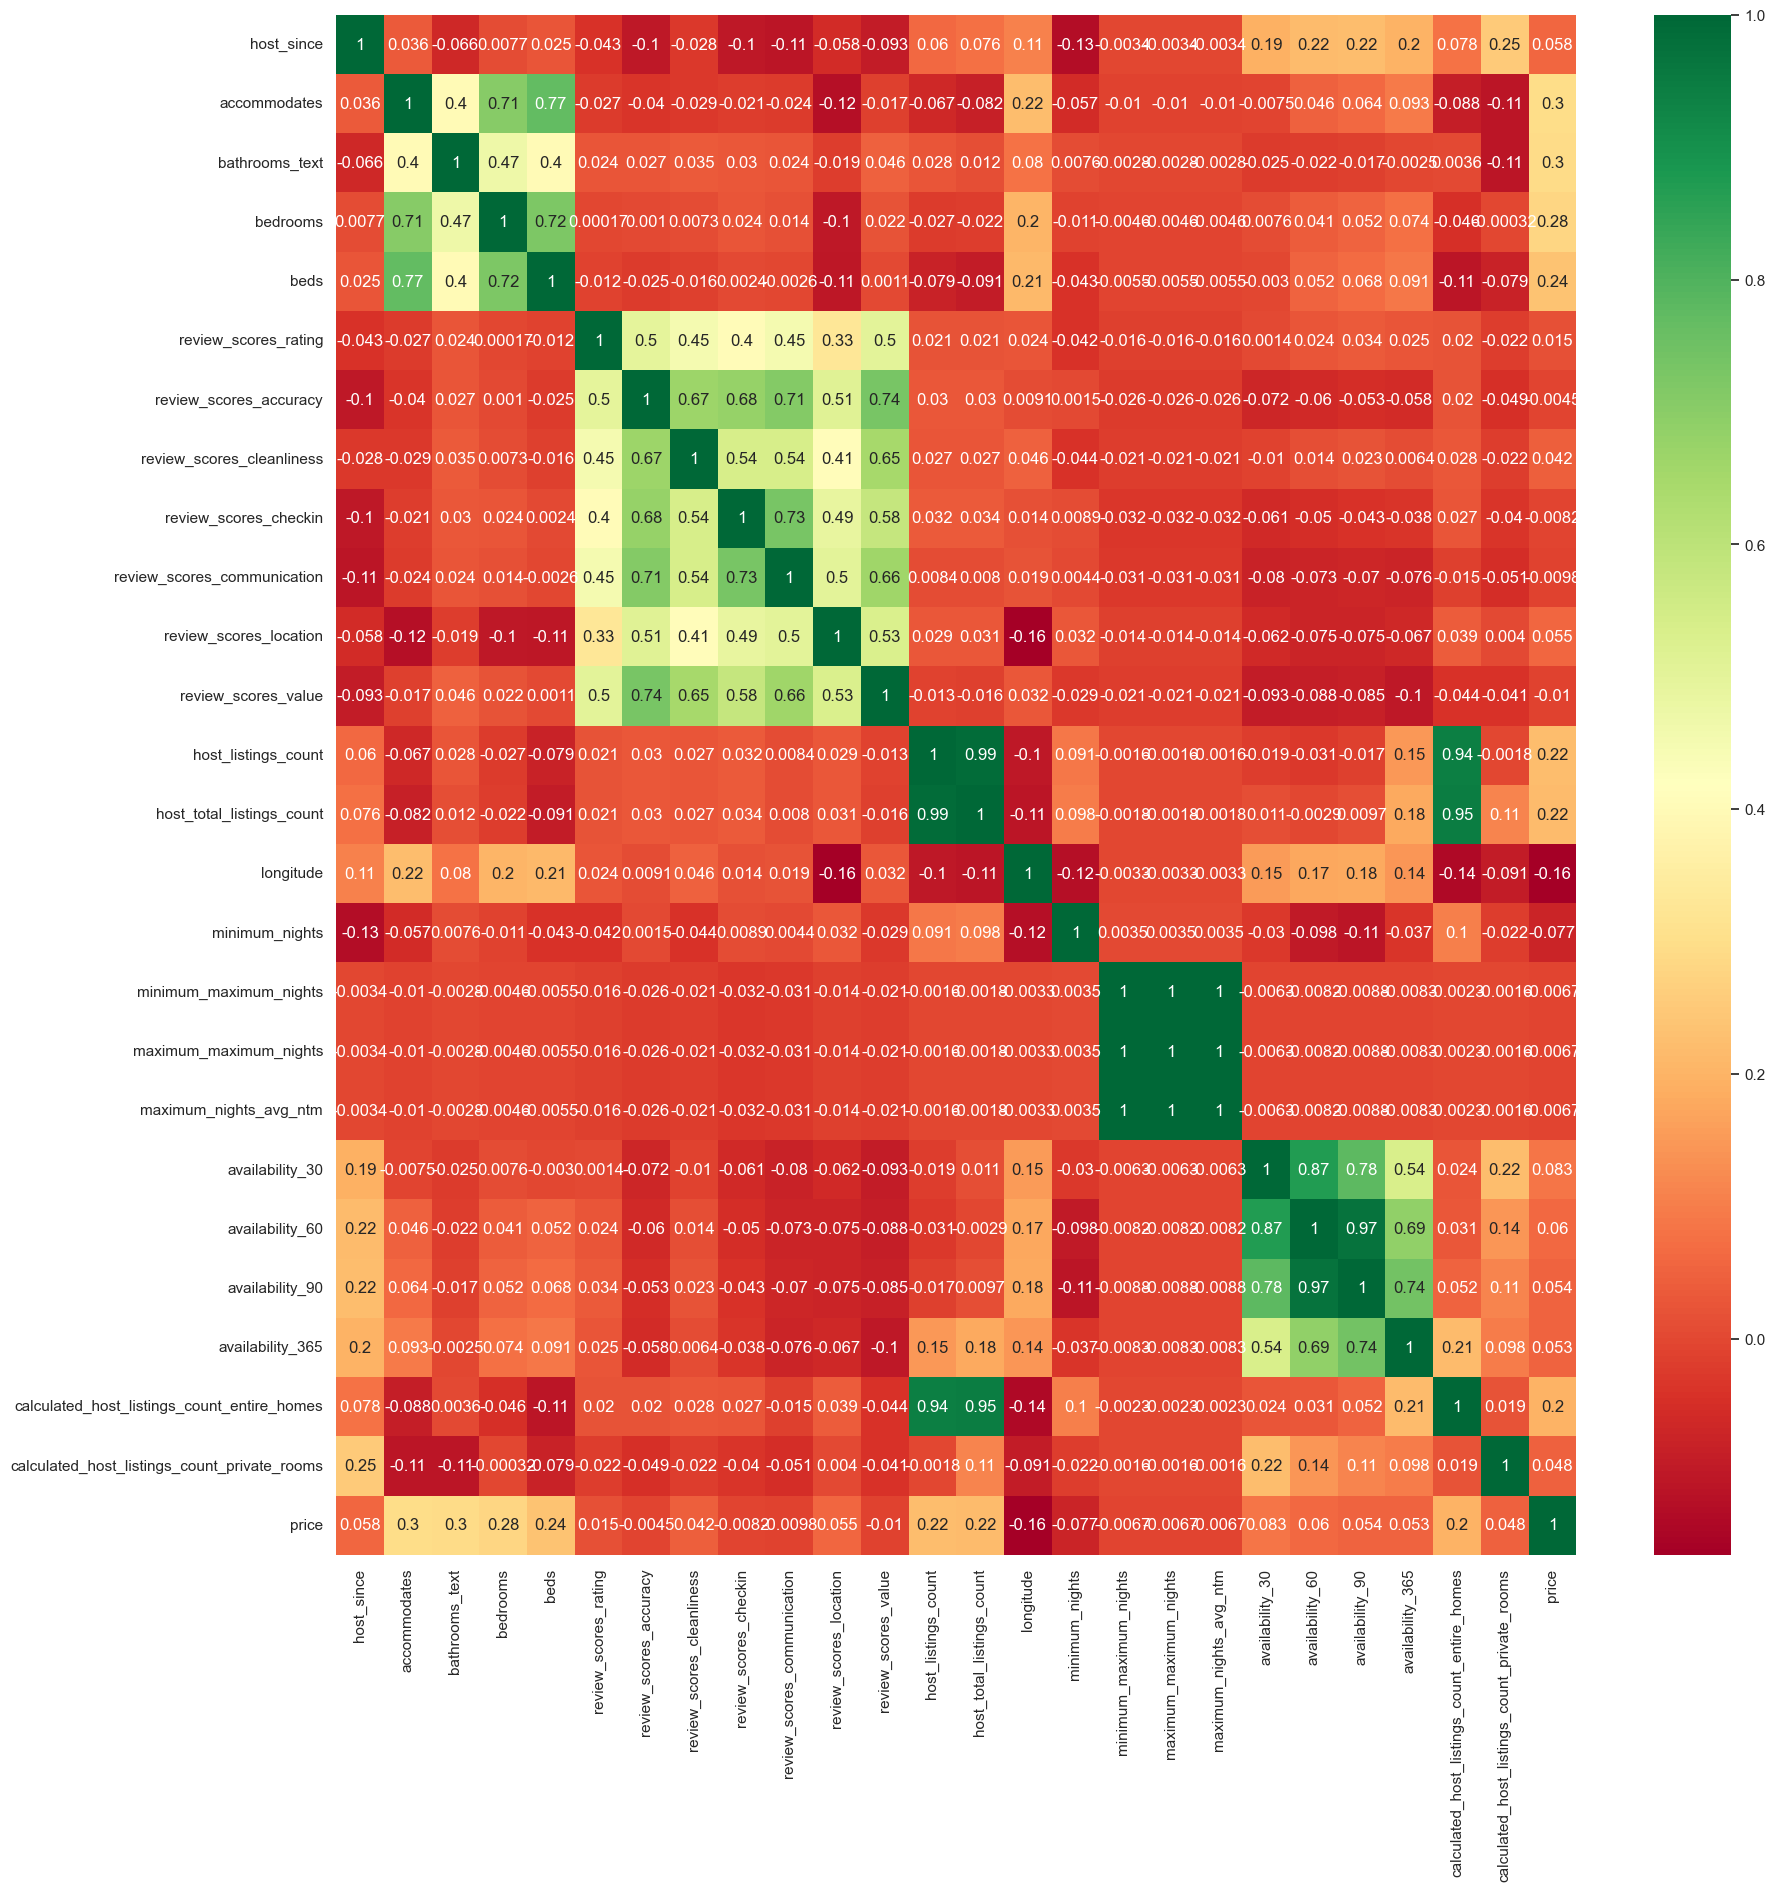

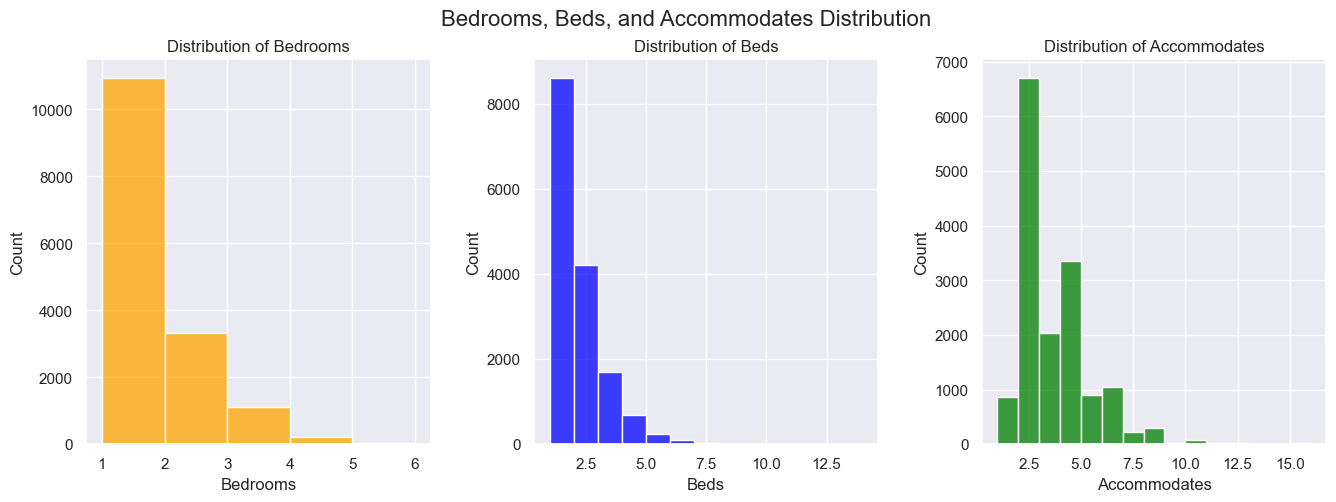

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

# Plot the count of bedrooms on the first axis
sns.histplot(data=df, x='bedrooms', binwidth=1, kde=False, ax=axes[0], color='orange')
axes[0].set_xlabel('Bedrooms')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Bedrooms')

# Plot the count of beds on the second axis
sns.histplot(data=df, x='beds', binwidth=1, kde=False, ax=axes[1], color='blue')
axes[1].set_xlabel('Beds')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Beds')

# Plot the count of accommodates on the third axis
sns.histplot(data=df, x='accommodates', binwidth=1, kde=False, ax=axes[2], color='green')
axes[2].set_xlabel('Accommodates')
axes[2].set_ylabel('Count')
axes[2].set_title('Distribution of Accommodates')

# Add a title for the whole figure
fig.suptitle('Bedrooms, Beds, and Accommodates Distribution', fontsize=16)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the figure
plt.show()


<B> The below integrated graph provides a more comprehensive view of the relationships between the variables of interest. From the graphs, we see that most listings have 1 bedroom, can accommodate up to 4 guests, and have 1-2 beds. This implies that there are lesser options for people in big groups and Airbnb can use this type of visualization to improve their listings where they are lacking based on the graph.

C:\Users\16174\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


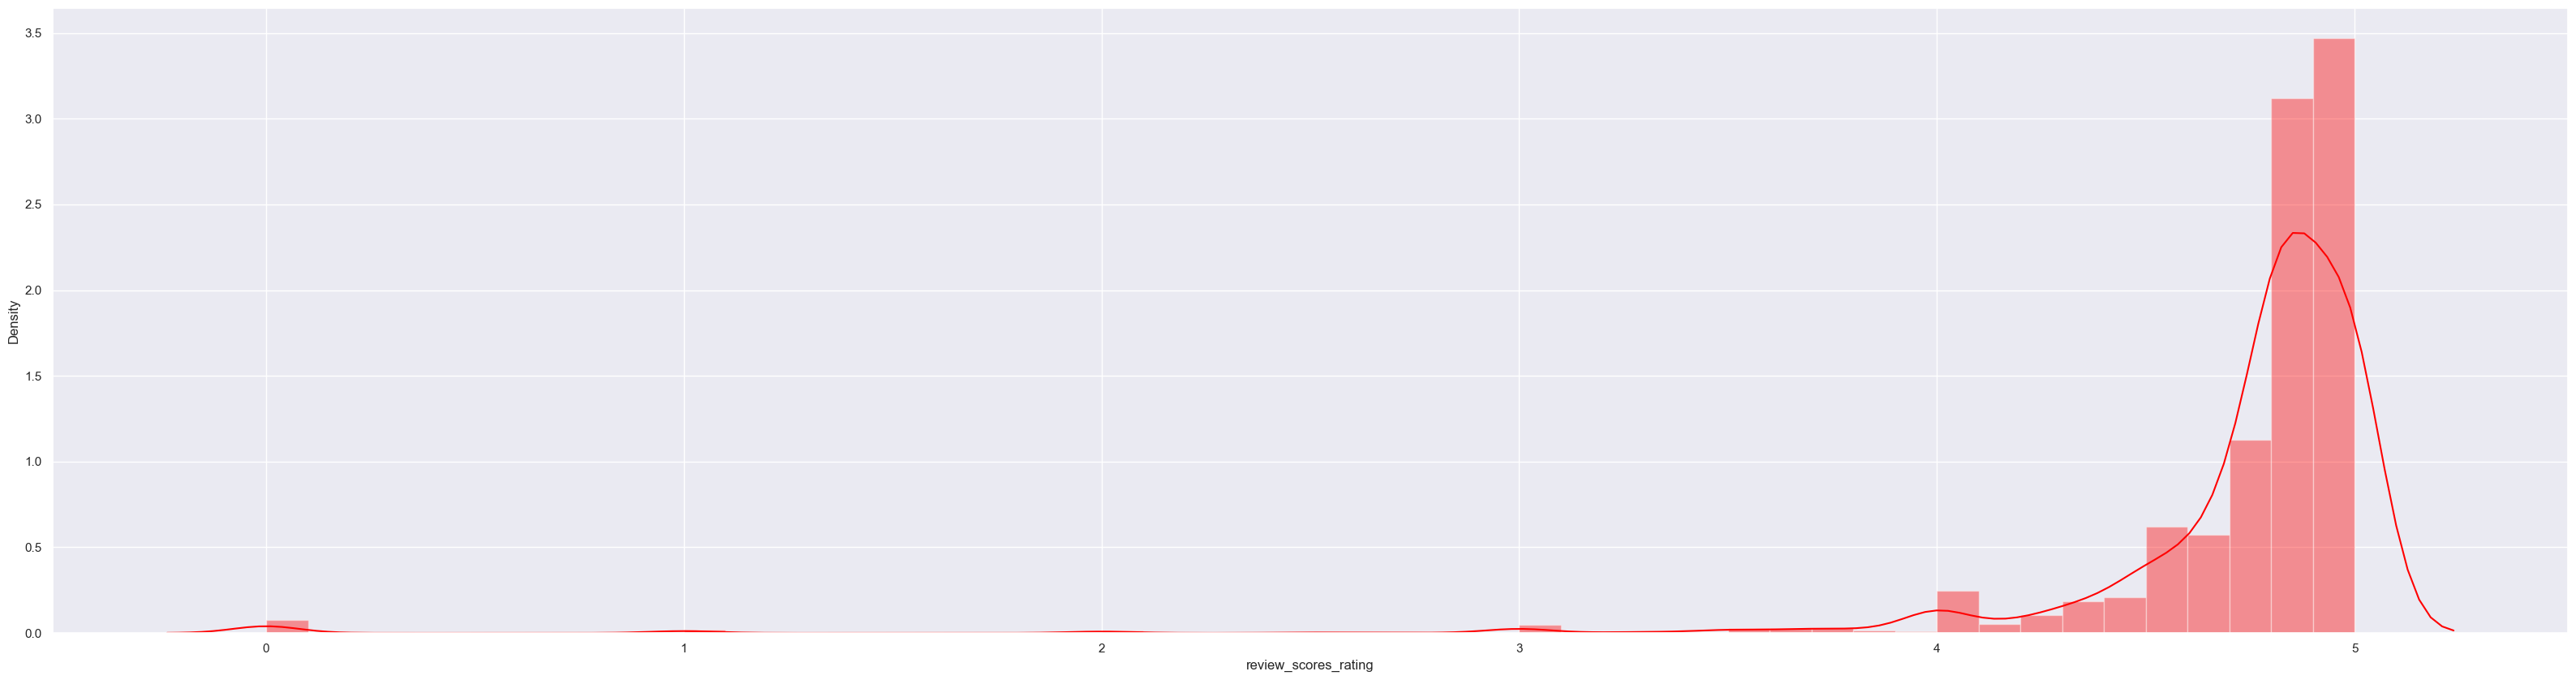

In [61]:
sns.distplot(df['review_scores_rating'], color='red')
plt.show()


<B> Creating a distribution plot of the review scores can provide insights into the overall review score, how they are distributed across the range of possible scores. This provides insights into the housing quality of New York. The following is a distribution plot for the review score rating.

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group_cleansed)
plt.ioff()

C:\Users\16174\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<B> The following is scatter plot representing the clusters of the neighborhoods hosting the listings in Manhattan, Brooklyn, Queens, Staten Island and Bronx area.

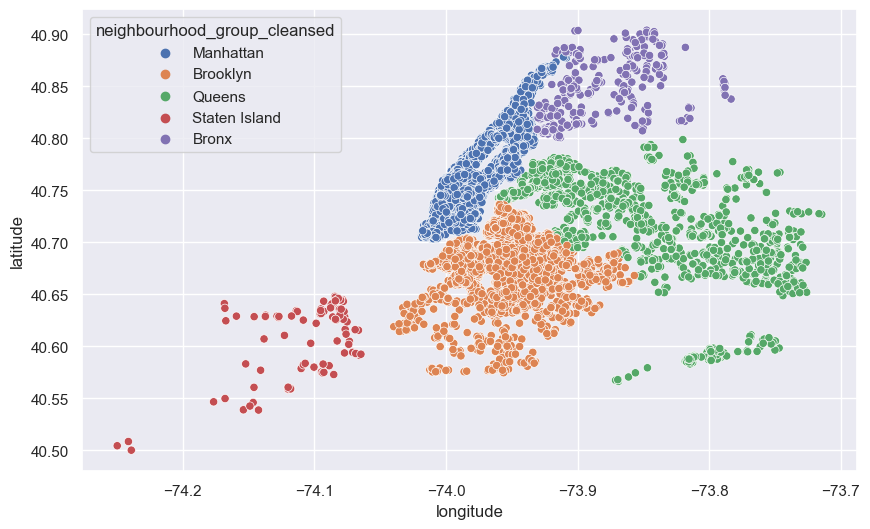

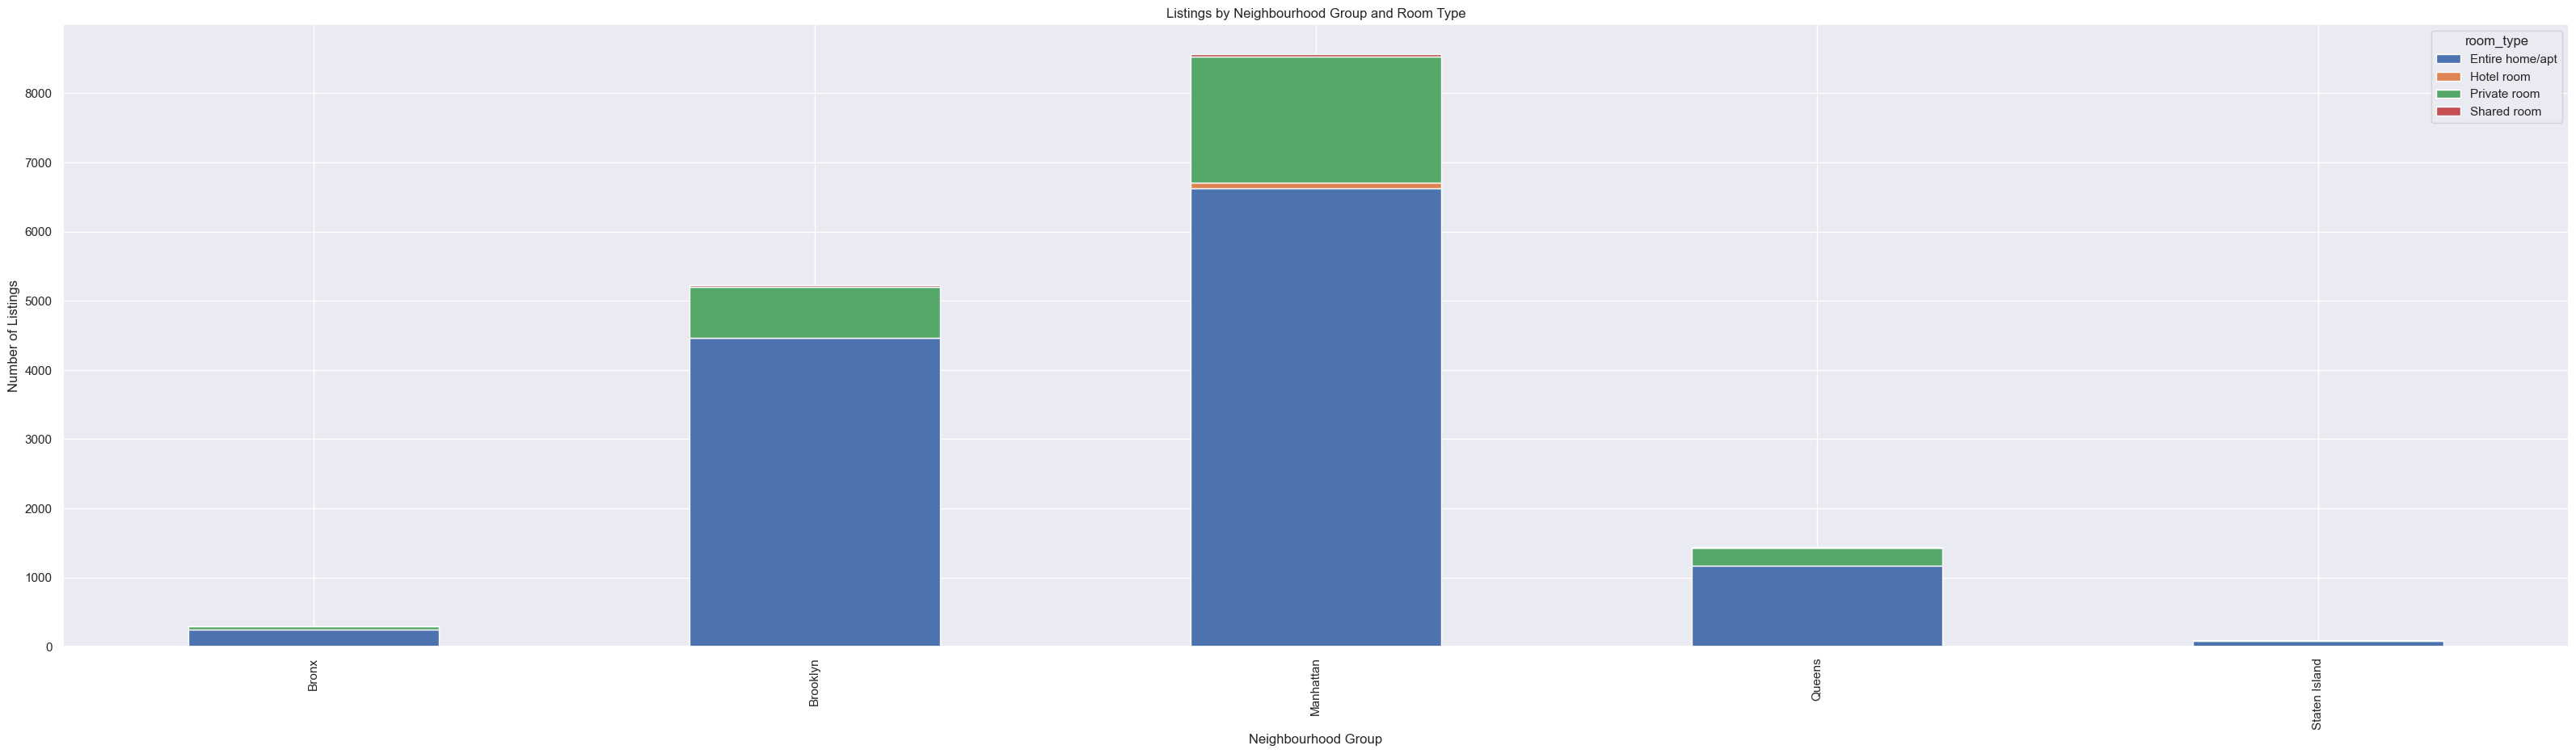

In [63]:
import matplotlib.pyplot as plt

# Group the data by neighbourhood_group_cleansed and room_type
grouped = df.groupby(['neighbourhood_group_cleansed', 'room_type']).size().unstack()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.title('Listings by Neighbourhood Group and Room Type')

plt.show()


<B> The following stacked bar chart represents the number of listings with the different room types grouped by neighborhood group. We can see that the number of properties in Staten Island is very less in comparison to other neighborhoods.

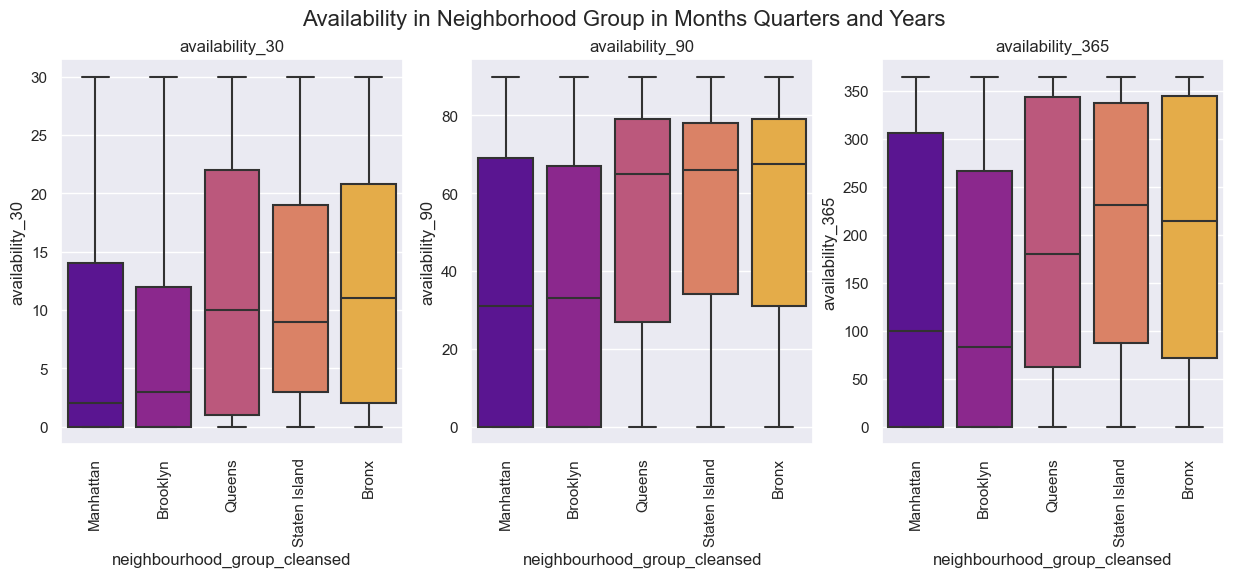

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the three availability columns
availability_cols = ['availability_30', 'availability_90', 'availability_365']
fig, axs = plt.subplots(nrows=1, ncols=len(availability_cols), figsize=(15, 5))

# Loop through each availability column and plot a boxplot with outliers
for i, col in enumerate(availability_cols):
    sns.boxplot(data=df, x='neighbourhood_group_cleansed', y=col, ax=axs[i], palette='plasma')
    axs[i].set_title(col)  
    # Rotate the x-axis labels by 90 degrees
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
plt.suptitle('Availability in Neighborhood Group in Months Quarters and Years', fontsize=16)

# Display the figure
plt.show()


<B> The following figure with three subplots, each showing a boxplot for one of the availability columns, with outliers displayed. The x-axis shows the neighborhood group, and the y-axis shows the availability for each listing. We can see that the monthly availability has outliers for Brooklyn, New York.

In [65]:
import pandas as pd
import folium
from IPython.display import display

# Load your DataFrame into the "df" variable

# Sort the DataFrame by the price column in descending order
df = df.sort_values("price", ascending=False)

# Select the top 10 rows
top_10 = df.head(10)

# Create a map centered at the average latitude and longitude of the top 10 listings
mean_latitude = top_10["latitude"].mean()
mean_longitude = top_10["longitude"].mean()
map_ = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=12)

# Add markers for the top 10 listings
for i, row in top_10.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        tooltip=f"Price: ${row['price']}",
    ).add_to(map_)

# Display the map
display(map_)


# 6. Exploratory data analysis

<B>  Separating features that are numerical and categorical after data cleaning and perfoming label encoding for categorical avriables

In [66]:
#Categorical Features
columns_to_copy = ['host_since', 'host_is_superhost','host_identity_verified',
                   'host_has_profile_pic','neighbourhood_group_cleansed',       
             'neighbourhood_cleansed','property_type', 'room_type' ,'accommodates','bathrooms_text','bedrooms','beds','has_availability','review_scores_rating','review_scores_accuracy',
             'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable']
                                                                            
dfc = df[columns_to_copy]
dfc = dfc.astype('object')

In [67]:
# Initialize the LabelEncoder object
le = LabelEncoder()
for col in dfc:
    dfc[col] = le.fit_transform(dfc[col])

In [68]:
#Numerical Variables
columns_to_copy2 =  [
 'host_listings_count',
 'host_total_listings_count',
 'longitude',
 'minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'maximum_nights_avg_ntm',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms'] 
 # create a new dataframe using the selected columns
dfn = df[columns_to_copy2]

<b> Merging categorical and numerical dataframes 

In [69]:
df_model = dfc.join(dfn)

In [70]:
# appending the target variable  to the final dataset 
df_model['price'] = df['price']

# 7. Feature Selection

<B> Univariate Selection

In [71]:
# Separate the target variable and predictor variables
X = df_model.drop(columns=['price'])
y = df_model['price']

# Scale input data to range [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_scaled, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concatenate the two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']  # naming the dataframe columns
featureScores['Score'] = featureScores['Score'].round(0)

# Print the 10 best features
print(featureScores.nlargest(10, 'Score'))


                                         Feature   Score
21                           host_listings_count  3501.0
22                     host_total_listings_count  3176.0
32   calculated_host_listings_count_entire_homes  2500.0
33  calculated_host_listings_count_private_rooms  2466.0
7                                      room_type  1139.0
1                              host_is_superhost  1007.0
20                              instant_bookable   880.0
31                              availability_365   584.0
10                                      bedrooms   538.0
28                               availability_30   529.0


<B> Representing top 10 features

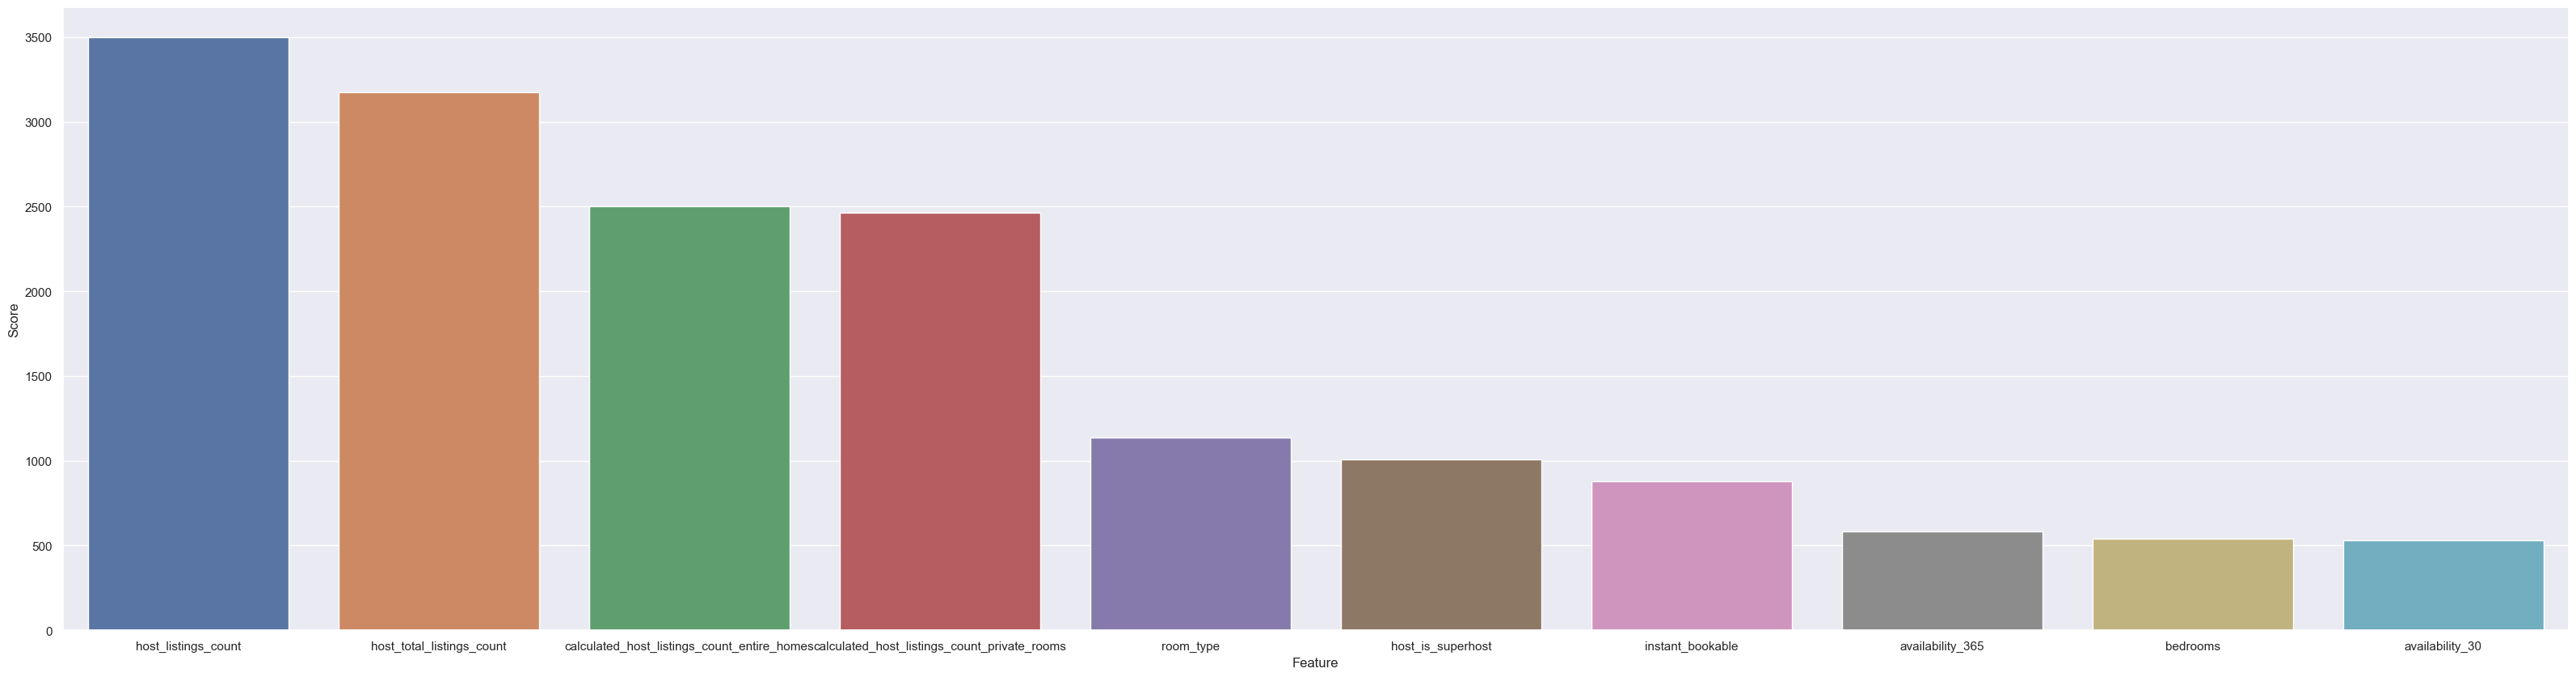

In [97]:
#Visualizing the prominent features 
sns.set(rc = {'figure.figsize':(40,10)})
sns.barplot(x=featureScores.nlargest(10,'Score').Feature, y=featureScores.nlargest(20,'Score').Score)
plt.show()

<B> Feature Importance
    
    Looking at the dataset feature importance is prioritized. The higher the importance more it is going to contribute to the predictor variable.

[0.03143222 0.00463521 0.00463757 0.00158352 0.01728861 0.04123665
 0.0810844  0.01101133 0.05470948 0.09118777 0.03548287 0.01472923
 0.00432928 0.02114565 0.01537365 0.02040731 0.01486886 0.01388951
 0.02341104 0.02092751 0.00433293 0.03590322 0.03264388 0.14432353
 0.06526445 0.01388444 0.00815633 0.01097488 0.03465244 0.02026388
 0.02381026 0.03607282 0.03432037 0.01202488]


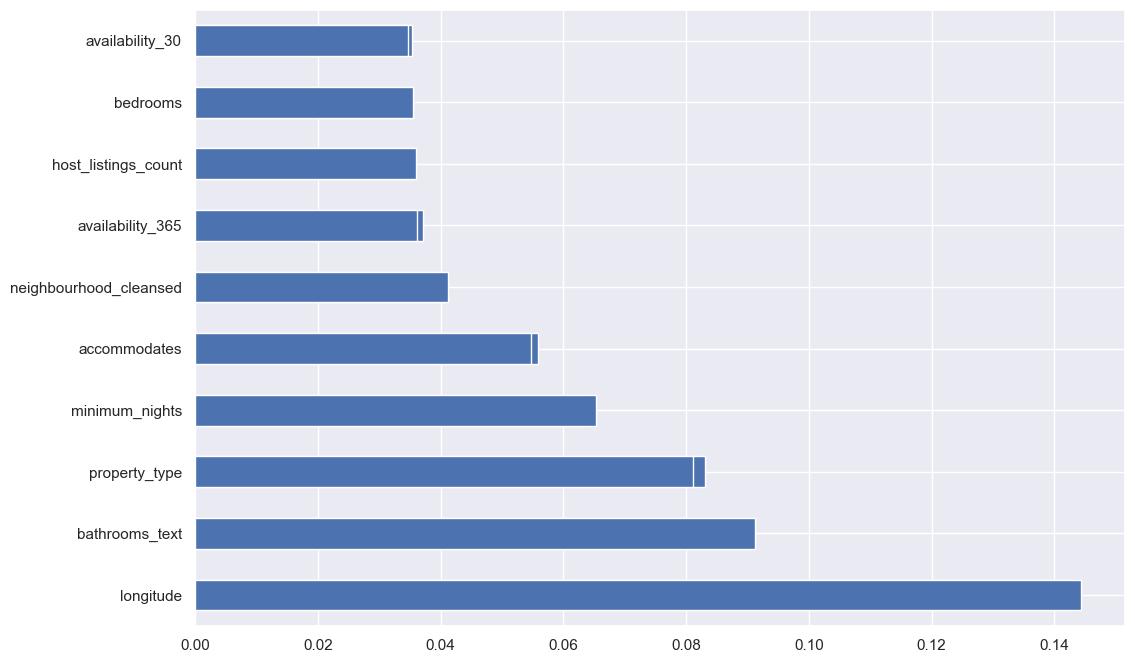

In [76]:
model = RandomForestRegressor()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
#plt.figure(figsize = (12,8))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

<B> Correlation  with Heatmap

In [86]:
# Dataset splits into training and testing sets, 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#get correlations of each features in dataset
corrmat = df_model.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [88]:
#Funtion to look for multicolinearity 
corr_matrix = X_train.corr()
def corr(df, threshold):
    correlated_cols = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                print(corr_matrix.columns[i],corr_matrix.columns[j])
                correlated_cols.add(colname)
    return correlated_cols

In [89]:
#Looking at features that has Multicolinearity more than 0.7
corr(X_train, 0.7)

room_type property_type
bedrooms accommodates
beds accommodates
beds bedrooms
review_scores_accuracy review_scores_rating
host_total_listings_count host_listings_count
maximum_maximum_nights minimum_maximum_nights
maximum_nights_avg_ntm minimum_maximum_nights
maximum_nights_avg_ntm maximum_maximum_nights
availability_60 availability_30
availability_90 availability_30
availability_90 availability_60
availability_365 availability_90
calculated_host_listings_count_entire_homes host_listings_count
calculated_host_listings_count_entire_homes host_total_listings_count


{'availability_365',
 'availability_60',
 'availability_90',
 'bedrooms',
 'beds',
 'calculated_host_listings_count_entire_homes',
 'host_total_listings_count',
 'maximum_maximum_nights',
 'maximum_nights_avg_ntm',
 'review_scores_accuracy',
 'room_type'}

In [84]:
#Dropping features
df = df.drop(['accommodates', 'host_total_listings_count'], axis=1)

In [85]:
X.columns

Index(['host_since', 'host_is_superhost', 'host_identity_verified',
       'host_has_profile_pic', 'neighbourhood_group_cleansed',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'has_availability',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'host_listings_count',
       'host_total_listings_count', 'longitude', 'minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms'],
      dtype='object')

# 8. Data Modelling

 <B> Regression  Models

In [90]:
#Regression models taken for model building 
regg_models = [LinearRegression(), Lasso(), Ridge(), SVR(), RandomForestRegressor(), DecisionTreeRegressor(), xgb.XGBRegressor()]

In [104]:
# X_train, X_test, y_train, y_test
#Making list to append scores in the Metrics for Regression
R2_score = [] 
Score_Train=[] 
Score_Test=[] 
RMSE = []
MAE=[]
Error=[] 
MSE=[]
mean=[] 
std=[]
    
#Making ditonary to plot bar graph
# R2_score_df=()
R2_score_dict = {} 
RMSE_score_dict = {} 
MAE_score_dict = {} 
MSE_score_dict={} 
Score_Train__dict={} 
Score_Test__dict={} 
Cross_Valication_score_dict={}

for i in regg_models:    
    train_model = i.fit(X_train, y_train)
    y_pred = train_model.predict(X_test)
    #R2Score
    r2score=metrics.r2_score(y_test,y_pred) # (coefficient of determination) regression score function
    R2_score.append(r2score)
    #Score training dataset
    scoretrain=train_model.score(X_train,y_train)
    Score_Train.append(scoretrain)
    #Score training dataset
    scoretest=train_model.score(X_test,y_test)
    Score_Test.append(scoretest)
    
    #Normaized RMSE
    rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))/(max(y)-min(y))
    RMSE.append(rmse)   
    #MSE
    mse = metrics.mean_squared_error(y_test, y_pred)
    MSE.append(mse)   
    #MAE
    mae=metrics.mean_absolute_error(y_test,y_pred)
    MAE.append(mae)
    #Cross validation score
    cvs=cross_val_score(i,X,y,cv=5,scoring=make_scorer(r2_score))
    mean.append(np.mean(cvs))
    std.append(np.std(cvs))  

df_score= pd.DataFrame()
df_score['Models'] = ['LinearRegression', 'Lasso', 'Ridge', 'SVR', 'RandomForestRegressor', 'DecisionTreeRegressor', 'XGBRegressor']
df_score['R2_score'] = R2_score
df_score['Score_Train'] = Score_Train
df_score['Score_Test'] = Score_Test
df_score['RMSE'] = RMSE
df_score['MAE'] = MAE
df_score['MSE'] = MSE
df_score                  


C:\Users\16174\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.862e+07, tolerance: 1.264e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\16174\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.190e+07, tolerance: 2.949e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\16174\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.535e+07, toleranc

Models  R2_score  Score_Train  Score_Test      RMSE  \
0       LinearRegression  0.081184     0.296262    0.081184  0.192811   
1                  Lasso  0.142121     0.241100    0.142121  0.186307   
2                  Ridge  0.076236     0.296181    0.076236  0.193329   
3                    SVR -0.106690    -0.106698   -0.106690  0.211607   
4  RandomForestRegressor  0.513052     0.933134    0.513052  0.140365   
5  DecisionTreeRegressor  0.051885     0.999953    0.051885  0.195861   
6           XGBRegressor  0.506717     0.827020    0.506717  0.141275   

         MAE           MSE  
0  62.388355   9219.796945  
1  65.053284   8608.327752  
2  62.403291   9269.440360  
3  72.848541  11104.998138  
4  48.828951   4886.242931  
5  66.179032   9513.788731  
6  48.786924   4949.810375

## R square Score

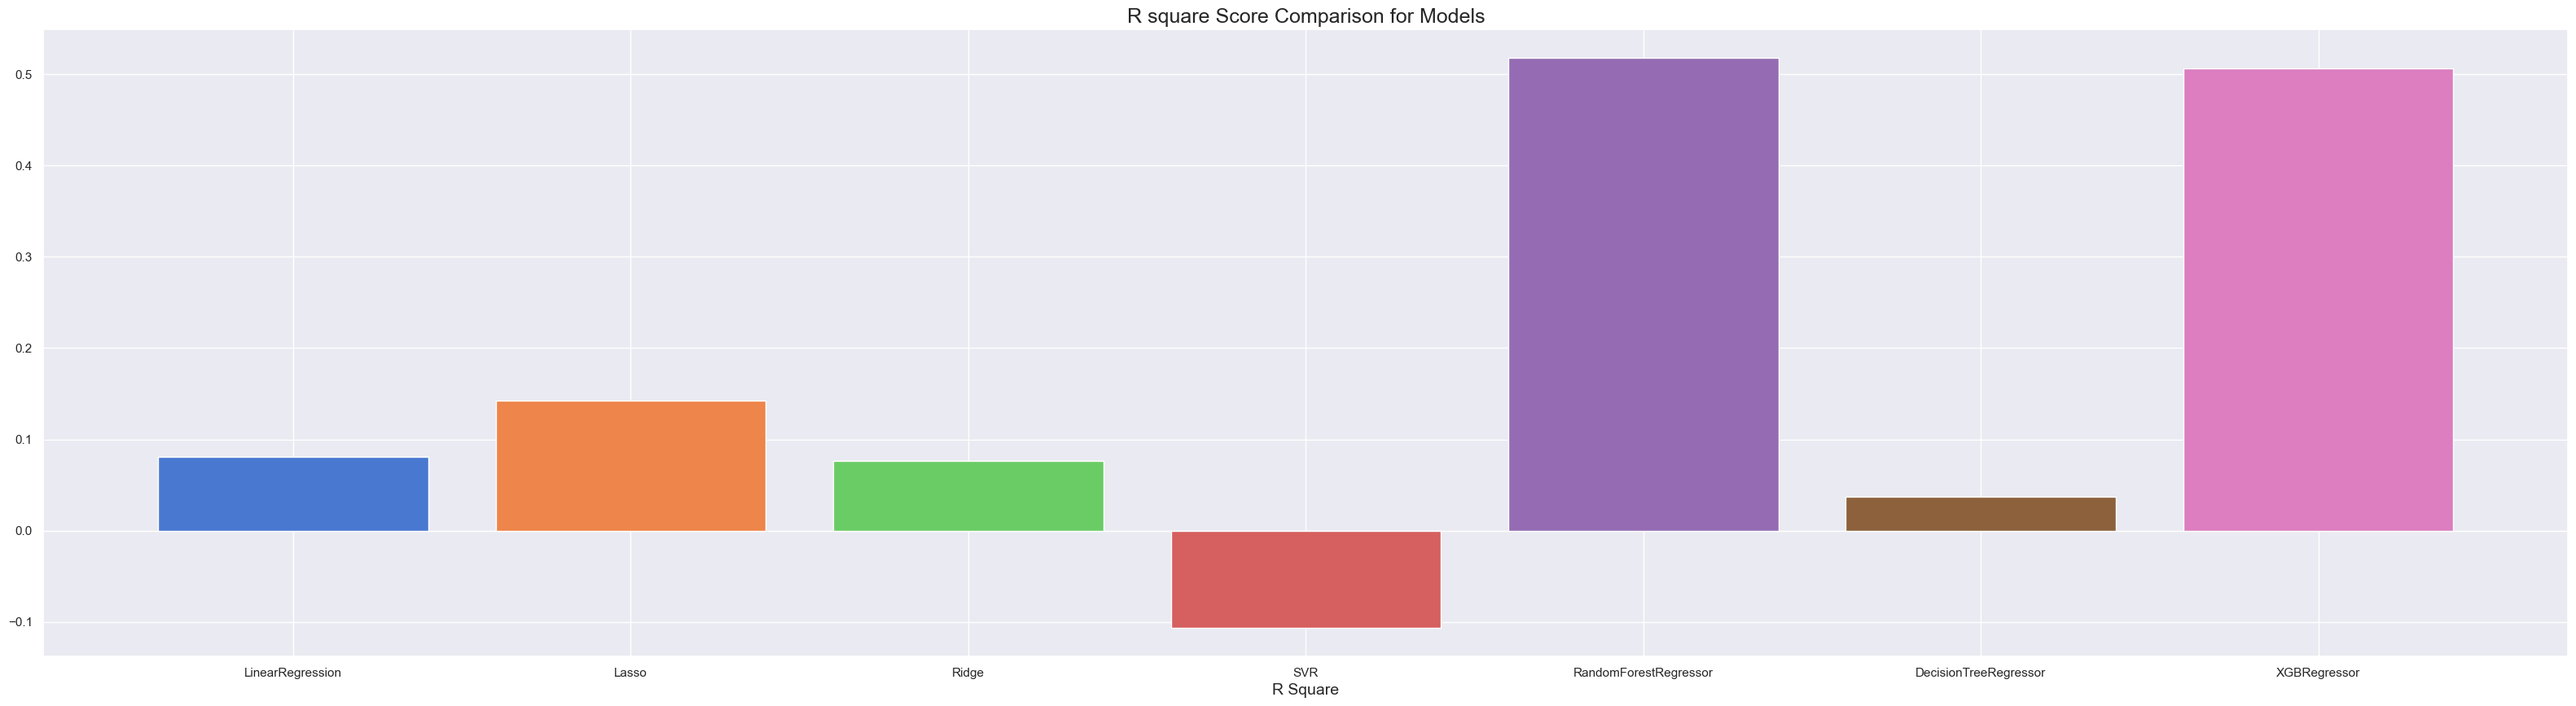

In [95]:
#comparing R2_score for all models and finding out which model performs the best
plt.bar(df_score['Models'], df_score['R2_score'],color=sns.color_palette('muted'))
plt.title('R square Score Comparison for Models', fontsize=18)
plt.xlabel('R Square', fontsize=14)
plt.show()

<B> Higher R square – is a better fit

In this case we can see both Random Forest Regressor and XGBRegressor both perform well is better than other models. 

But we choose Random Forest Regressor as the Winner as it is less complex.

## **Train Score and Test Score**

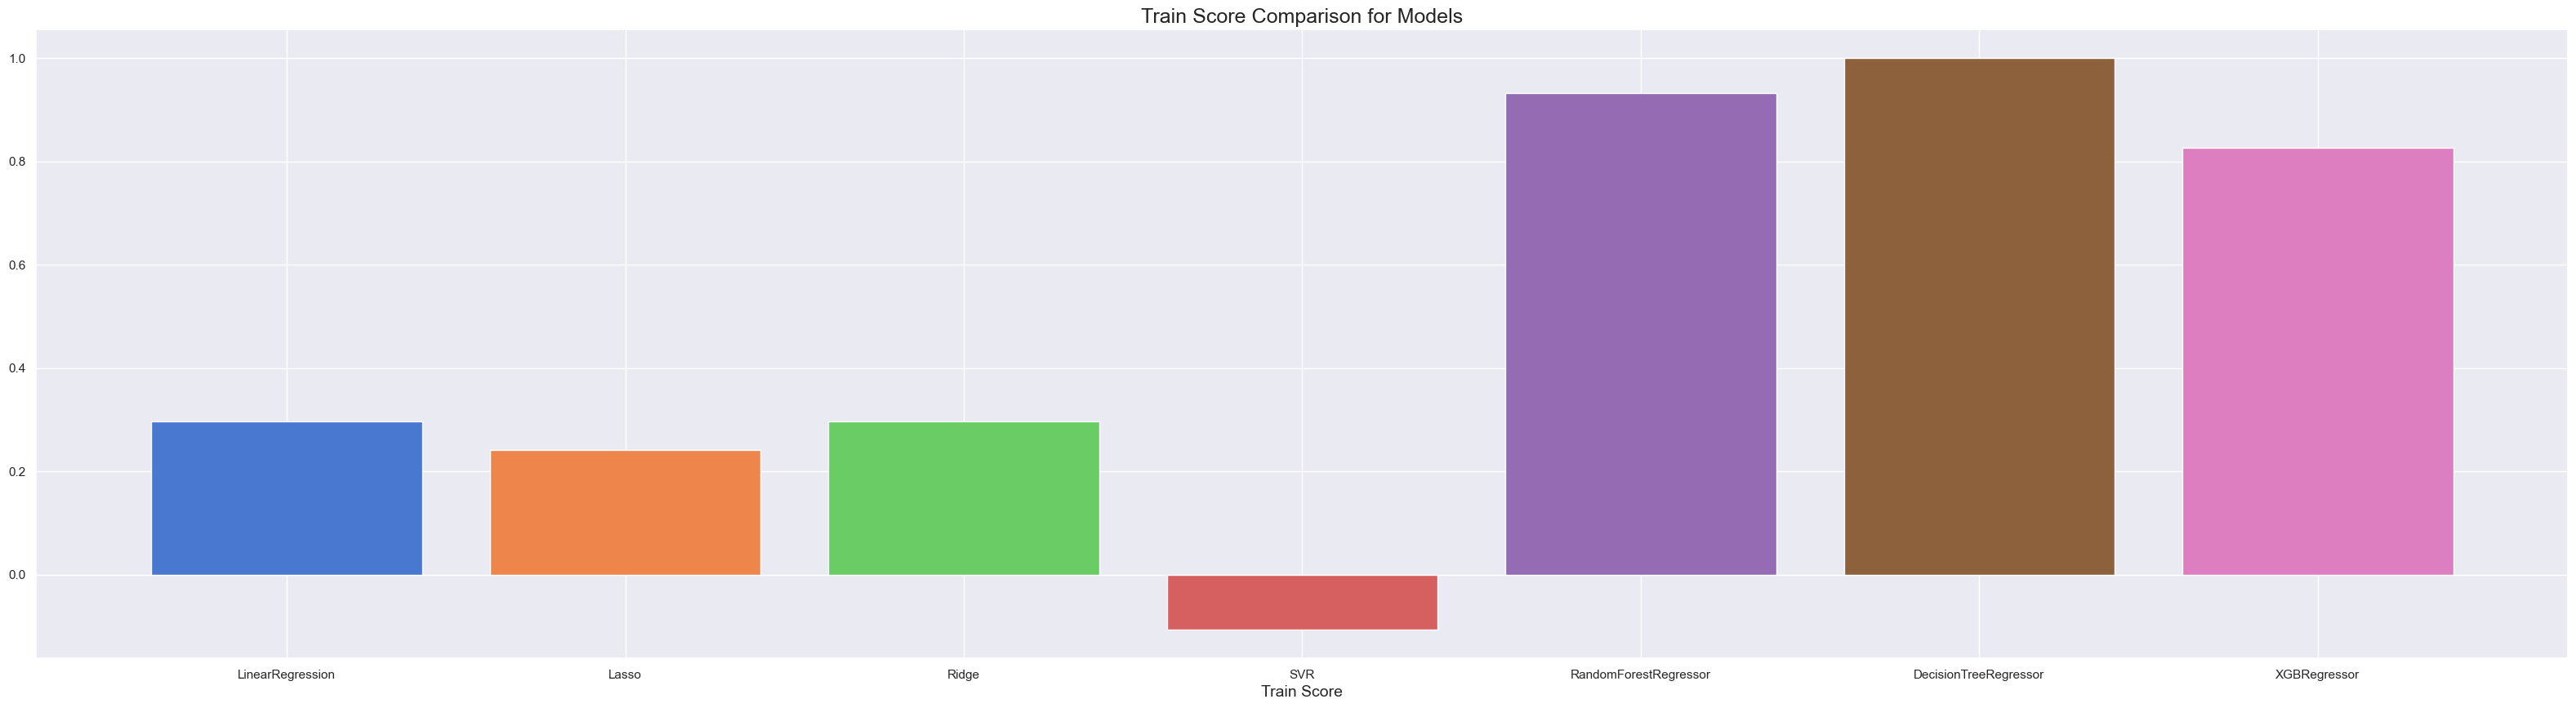

In [96]:
#comparing Train Score for all models and finding out which model performs the best
plt.bar(df_score['Models'], Score_Train,color=sns.color_palette('muted'))
plt.title('Train Score Comparison for Models', fontsize=18)
plt.xlabel('Train Score', fontsize=14)
plt.show()  

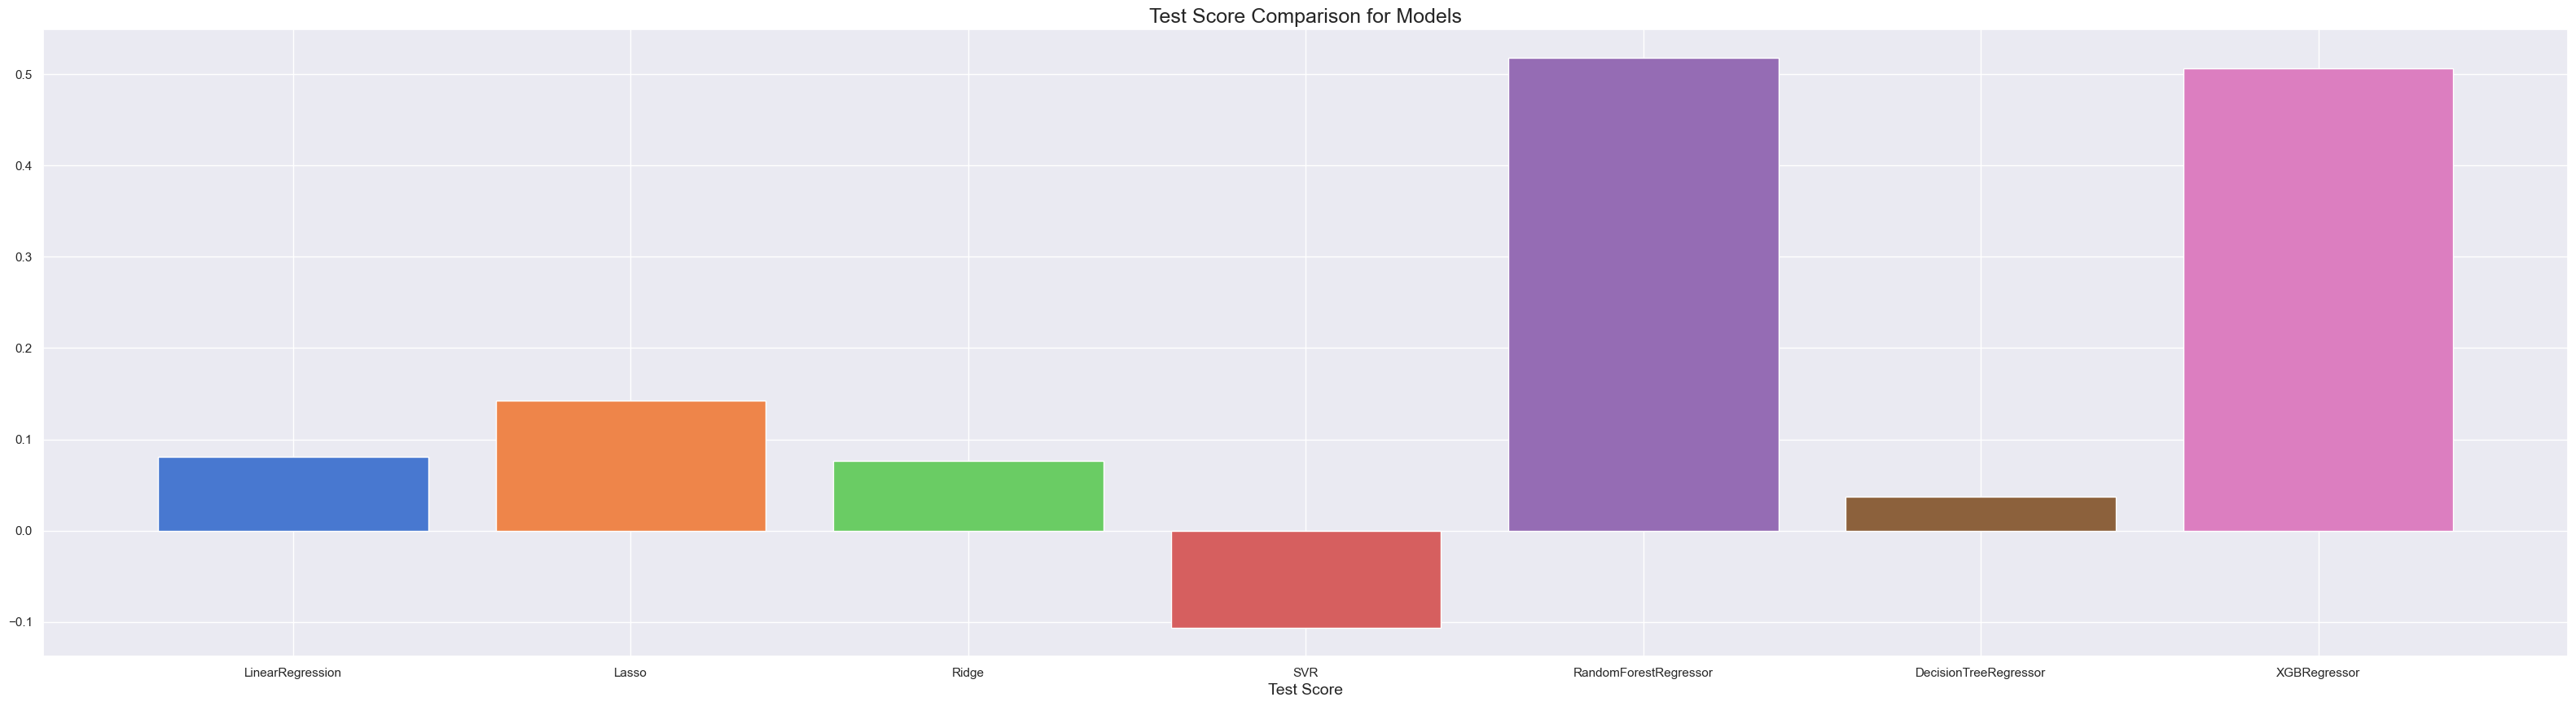

In [98]:
#comparing Test Score for all models and finding out which model performs the best
plt.bar(df_score['Models'], Score_Test,color=sns.color_palette('muted'))
plt.title('Test Score Comparison for Models', fontsize=18)
plt.xlabel('Test Score', fontsize=14)   
plt.show()  

### Root Mean Square Error (RMSE)

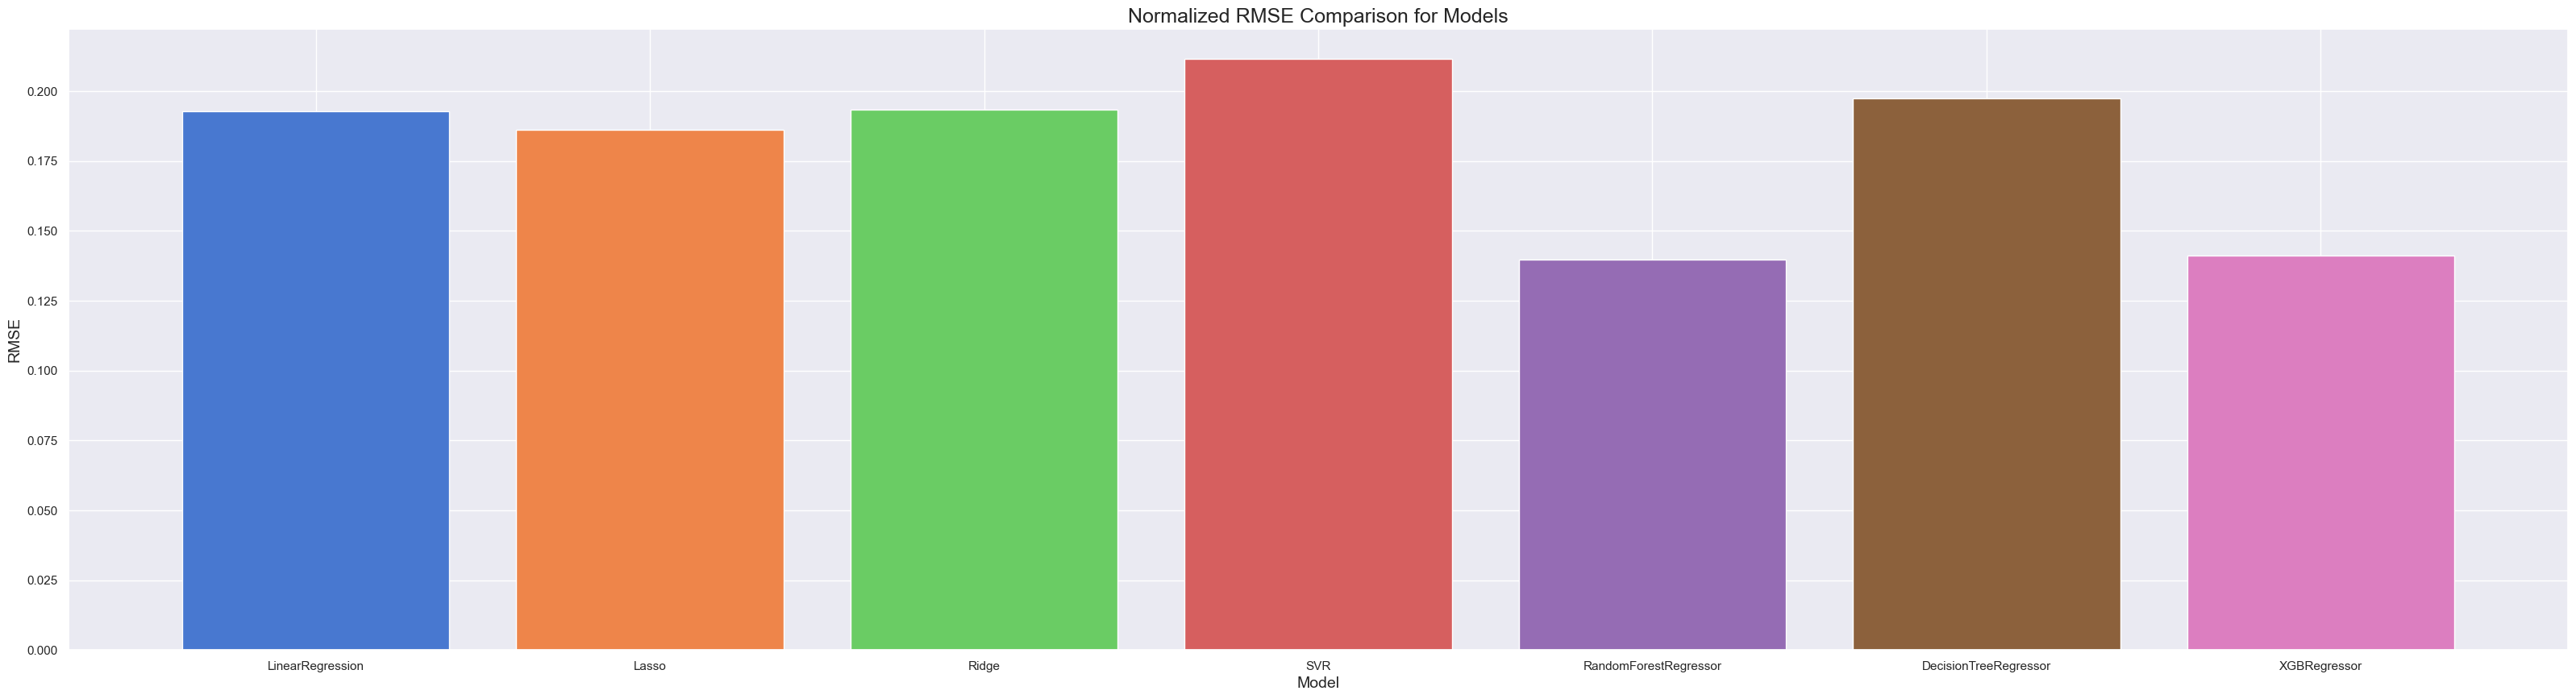

In [99]:
#comparing Normalized RMSE for all models and finding out which model performs the best
plt.bar(df_score['Models'], RMSE, color=sns.color_palette('muted'))
plt.title('Normalized RMSE Comparison for Models', fontsize=18)
plt.xlabel('Model', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.show()  

Lower Normalized RMSE shows better fit 

<B> Random Forest Regressor has low RMSE 

## Mean Absolute Error (MAE)

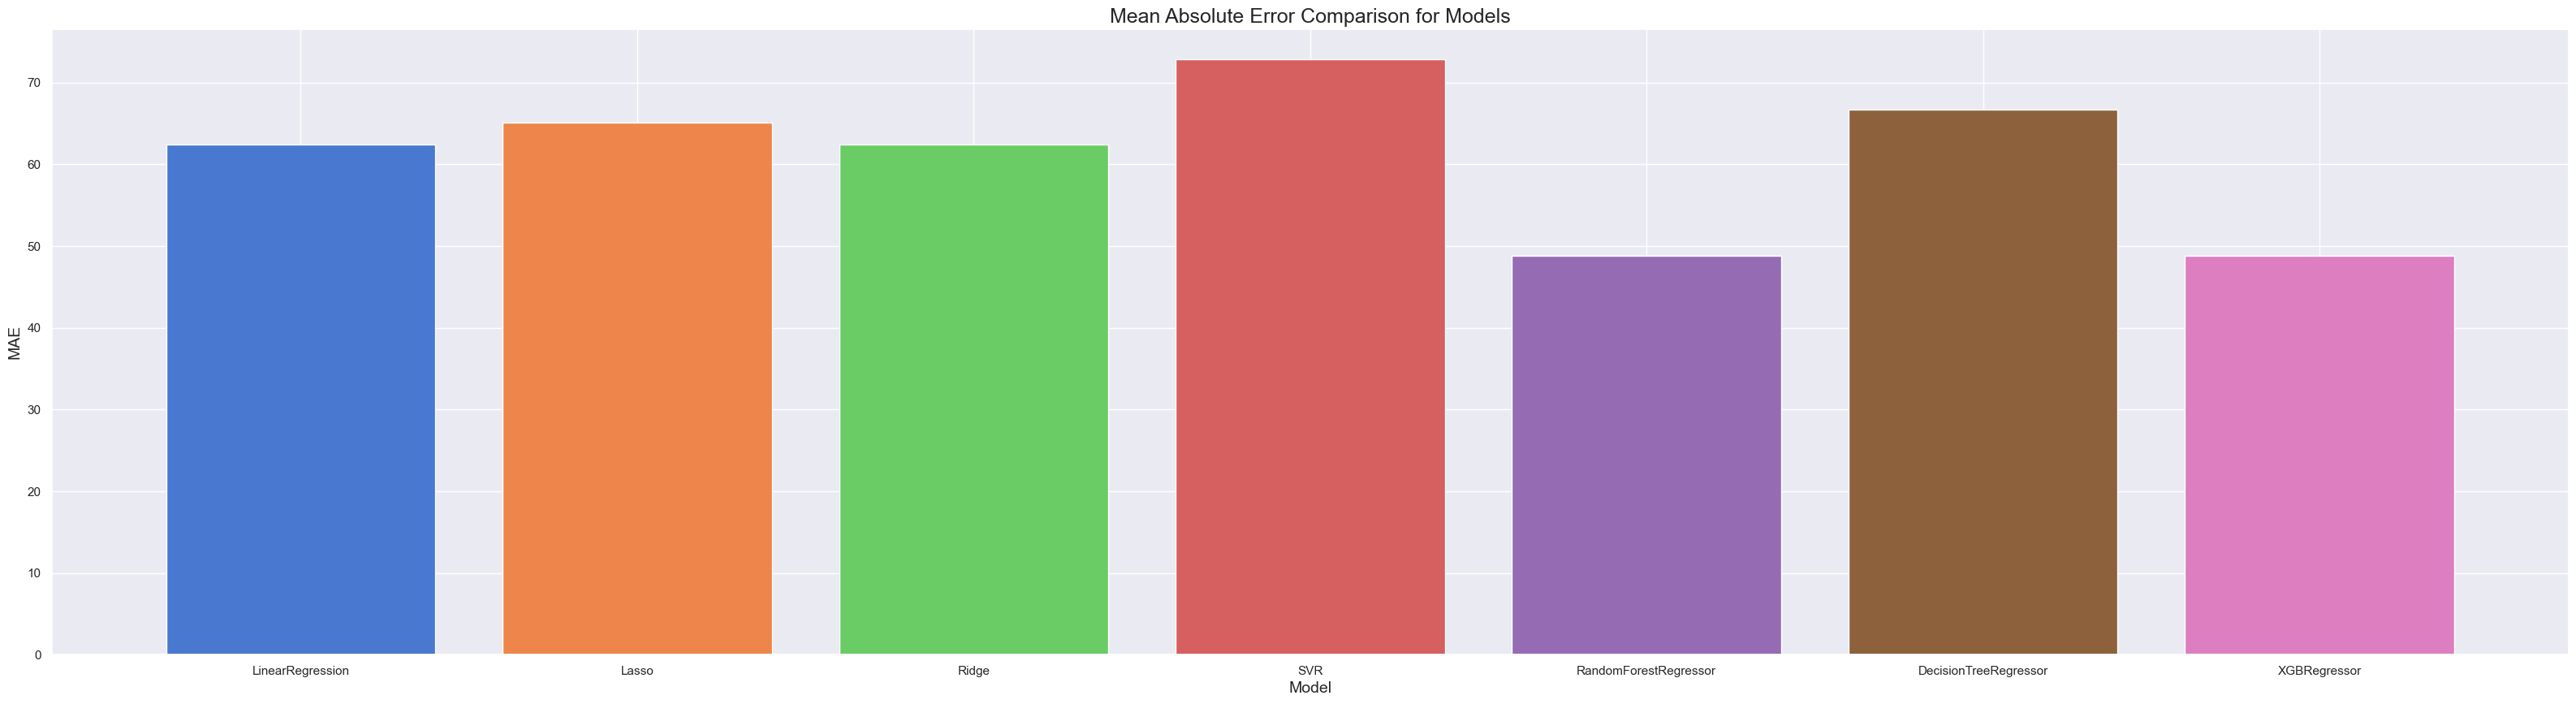

In [100]:
#comparing MAE for all models and finding out which model performs the best
plt.bar(df_score['Models'], MAE, color=sns.color_palette('muted'))
plt.title('Mean Absolute Error Comparison for Models', fontsize=18)
plt.xlabel('Model', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.show()  

<B> Random Forest Regressor has low MAE

## Mean Squared Error (MSE)

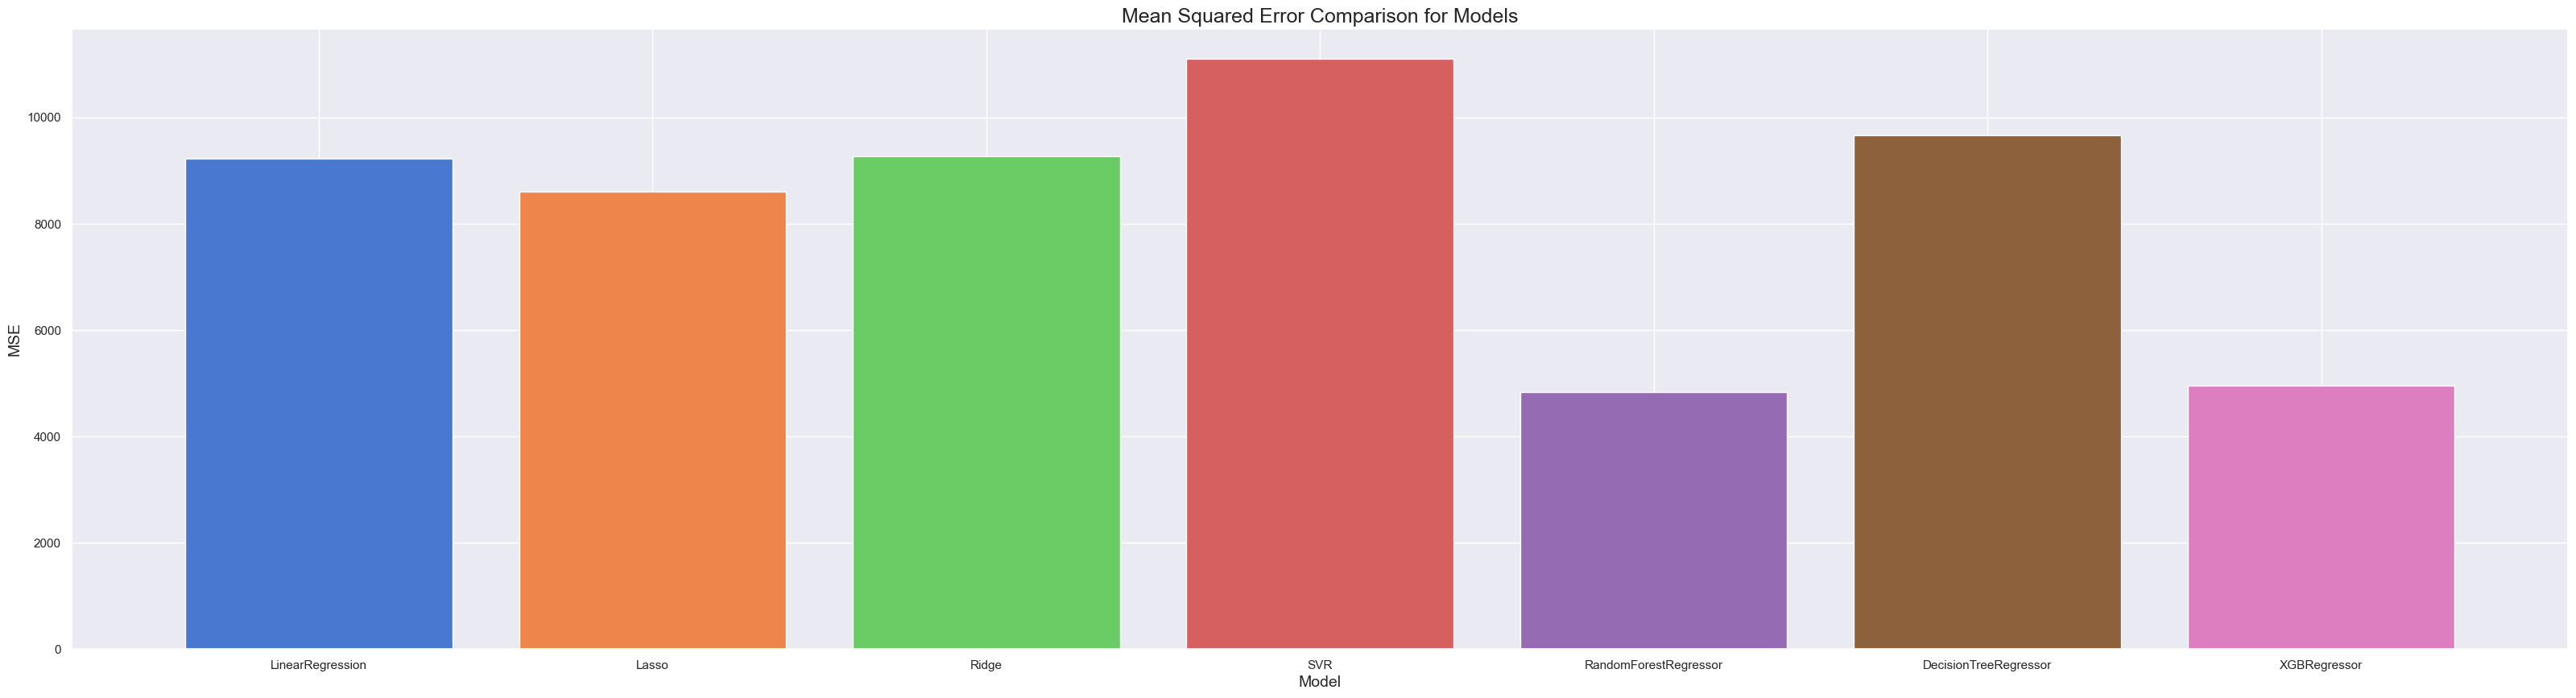

In [101]:
#comparing MSE for all models and finding out which model performs the best
plt.bar(df_score['Models'], MSE, color=sns.color_palette('muted'))
plt.title('Mean Squared Error Comparison for Models', fontsize=18)
plt.xlabel('Model', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.show()  

<B> Random Forest Regressor has low MSE

## Cross validation score

In [102]:
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 4846.690632986519


In [546]:
y_pred = reg_rf.predict(X_test)

In [547]:
print("Score train RandomForestRegressor : ",reg_rf.score(X_train,y_train))
print("Score test RandomForestRegressor : ",reg_rf.score(X_test,y_test))
print('R2_score RandomForestRegressor score function:', metrics.r2_score(y_test,y_pred)) # (coefficient of determination) regression score function

Score train RandomForestRegressor :  0.9330832695442417
Score test RandomForestRegressor :  0.5210279243820081
R2_score RandomForestRegressor score function: 0.5210279243820081


<B> Testing random forest with cross validation to understand if the model performance is stable across different training and validation dataset.


#### Distribution graph of error 

C:\Users\16174\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


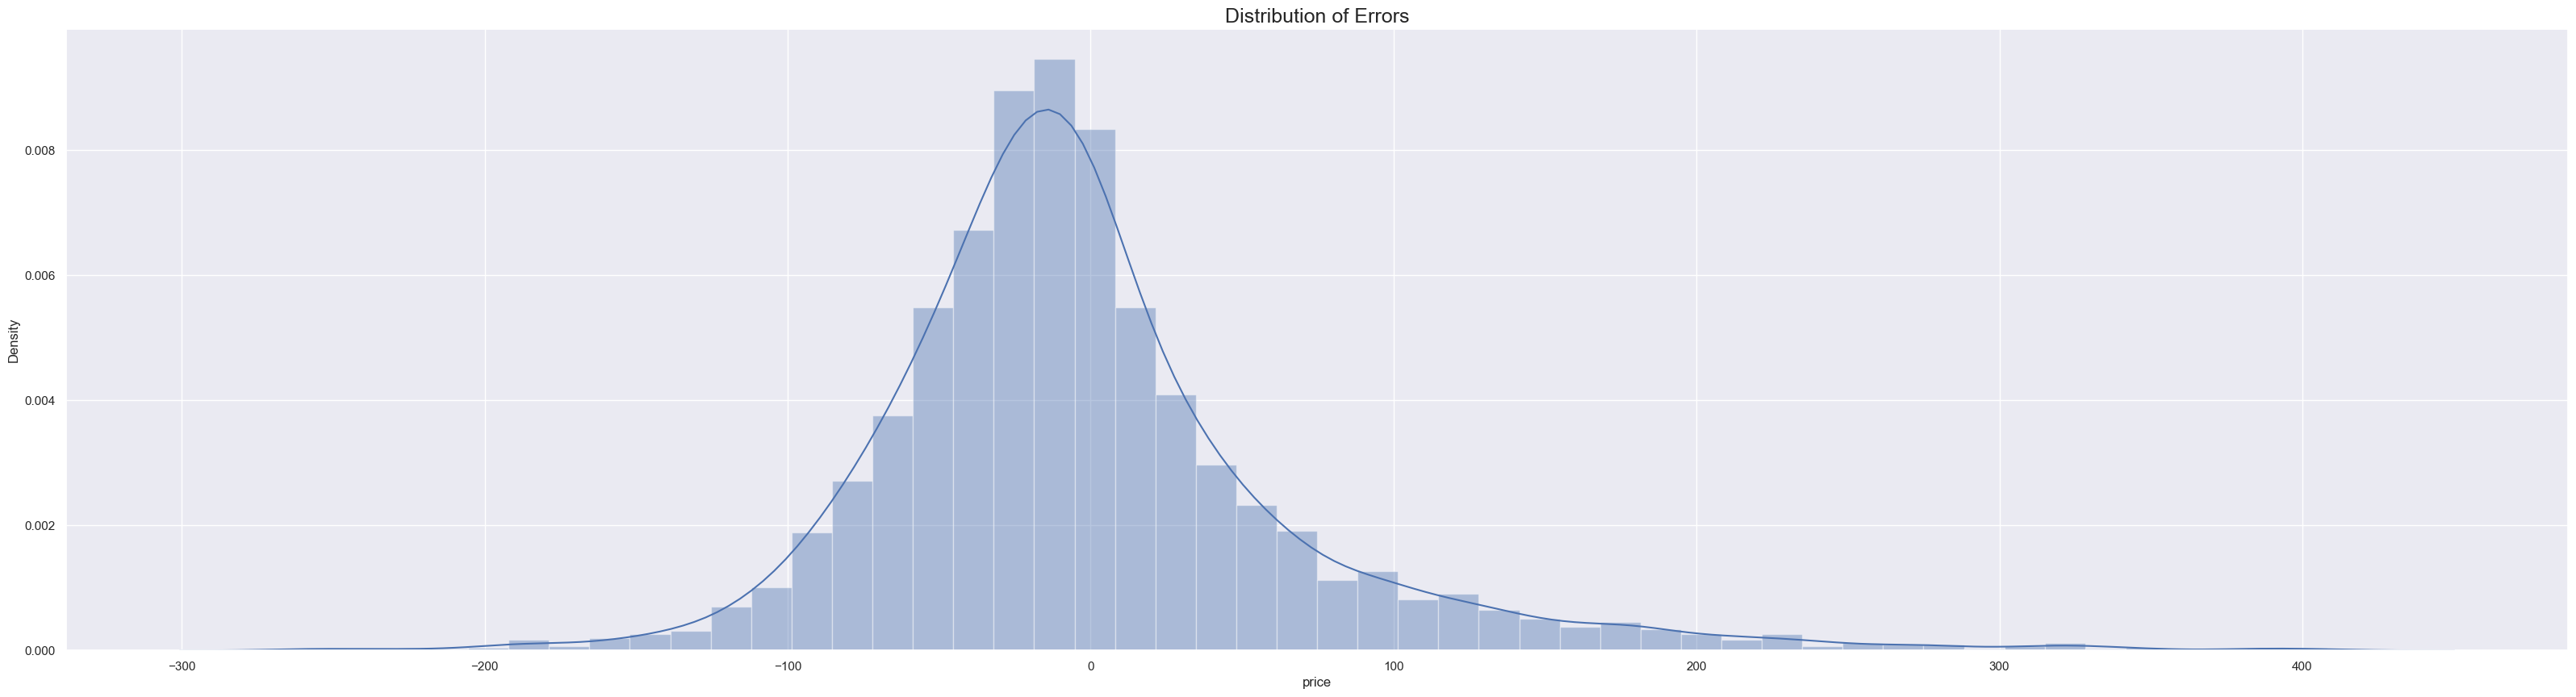

In [103]:
sns.distplot(y_test-y_pred)
plt.title('Distribution of Errors', fontsize=18)
plt.show()  

<B> Hyperparameter tunning

In [460]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)          
rf_random.fit(X_train,y_train)
rf_random.best_params_
prediction_random = rf_random.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  15.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  18.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

In [461]:
print("R2score:",metrics.r2_score(y_test,prediction_random)) 
print("scoretrain:",rf_random.score(X_train,y_train))
print("scoretest",rf_random.score(X_test,y_test))
rmse = np.sqrt(metrics.mean_squared_error(y_test,prediction_random))/(max(y)-min(y))
print("Normaized RMSE:", rmse)
print("MSE", metrics.mean_squared_error(y_test, prediction_random))
print("MAE:",metrics.mean_absolute_error(y_test,prediction_random))

R2score: 0.5154462744921959
scoretrain: -2114.4557996481376
scoretest -4519.583707846586
Normaized RMSE: 0.13499568112134153
MSE 4519.583707846586
MAE: 48.34730906288617
